In [37]:
import os, sys
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
sys.path.append('../src')
from utils import *
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import matplotlib.image as mpimg
import scipy.stats as stats
import scipy as sp
from scipy.stats import pearsonr,binom,linregress
from ast import literal_eval
import json
os.chdir("..")


In [38]:
experiment = "mindeye_extension_v6"
# experiment = "braindiffuser_nsd_vision"
df = pd.read_csv(f"output/dataframes/{experiment}/all_subject_statistics2.csv")
# df = pd.read_csv(f"output/dataframes/{experiment}/all_subject_statistics.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'output/dataframes/mindeye_extension_v6/all_subject_statistics2.csv'

In [ ]:
# experiment = "braindiffuser_nsd_vision"
experiment = "mindeye_extension_v6"
num_samples = 982
directory_path = f"output/dataframes/{experiment}/subject1/statistics_df_{experiment}_{num_samples}_v2.csv"
df = pd.read_csv(directory_path)
# df.insert(loc=1, column='Subject', value=1)
# df = column_string_to_list(df)
for subject in [2,5,7]:
    new_df = pd.read_csv(f"output/dataframes/{experiment}/subject{subject}/statistics_df_{experiment}_{num_samples}_v2.csv")
    # new_df.insert(loc=1, column='Subject', value=subject)
#     # new_df = column_string_to_list(new_df)
    df = pd.concat([df, new_df])


# print(df)
df.to_csv(f"output/dataframes/{experiment}/all_subject_statistics2.csv")

In [ ]:
# experiment = "tagaki_nsd_vision"
experiment = "mindeye_nsd_vision"
num_samples = 982
directory_path = f"output/dataframes/{experiment}/subject{subject}/subject{subject}_statistics_{num_samples}.csv"
df = pd.read_csv(directory_path)
# df.insert(loc=1, column='Subject', value=1)
# df = column_string_to_list(df)
for subject in [2,5,7]:
    new_df = pd.read_csv(f"output/dataframes/{experiment}/subject{subject}/subject{subject}_statistics_{num_samples}.csv")
    # new_df.insert(loc=1, column='Subject', value=subject)
#     # new_df = column_string_to_list(new_df)
    df = pd.concat([df, new_df])


# print(df)
df.to_csv(f"output/dataframes/{experiment}/all_subject_statistics.csv")

In [ ]:
# Statistical Analysis
# df_final_samples    = df.loc[(df['Sample Indicator'] == 12) & (df['Sample Count'] == 0)]
df_final_samples    = df.loc[(df['Sample Indicator'] == 12)]
print(len(df_final_samples.index))
print(df_final_samples['Pixel Correlation'].mean())
# print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
print(df_final_samples['SSIM'].mean())
# print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
print(df_final_samples['AlexNet 2'].mean())
print(df_final_samples['AlexNet 5'].mean())
print(df_final_samples['AlexNet 7'].mean())
print(df_final_samples['CLIP Two-way'].mean())
print(df_final_samples['CLIP Cosine'].mean())
# print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))
print(df_final_samples['Inception V3'].mean())
print(df_final_samples['EffNet-B'].mean())
print(df_final_samples['SwAV'].mean())
print(df_final_samples['Brain Correlation V1'].mean())
print(df_final_samples['Brain Correlation V2'].mean())
print(df_final_samples['Brain Correlation V3'].mean())
print(df_final_samples['Brain Correlation V4'].mean())
print(df_final_samples['Brain Correlation Higher Visual'].mean())
print(df_final_samples['Brain Correlation NSD General'].mean())

19640
0.20178816559016738
0.2933627685622953
0.7567132441023021
0.8337115998264375
0.8620583863259363
0.8171508664627931
0.625541894949305
0.7940560569351279
0.8537384194534796
0.5143168587753523
0.16588022075479164
0.1429877256421495
0.14163454586982782
0.15713343492029422
0.2510396760661028
0.23196535967570933


In [ ]:
cnn = create_cnn_numpy_array(df_final_samples_2)
gt = create_cnn_numpy_array(df_ground_truth)


In [ ]:
cnn = create_cnn_numpy_array(df_final_samples_0)
gt = create_cnn_numpy_array(df_ground_truth)
distance_fn = sp.spatial.distance.variance

effnet = np.array([distance_fn(gt['EffNet-B'][i],cnn['EffNet-B'][i]) for i in range(897)])
swav = np.array([distance_fn(gt['SwAV'][i],cnn['SwAV'][i]) for i in range(897)])
print(effnet.shape, swav.shape)
# np.save("/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight-Archive/reconstructions/subject1/dataframes/effnet_sample_0.npy", effnet)
# np.save("/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight-Archive/reconstructions/subject1/dataframes/swav_sample_0.npy", swav)

(897,) (897,)


In [ ]:
df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 12)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 10)]

cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation ----------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine ----------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way ---------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'])))

print("------------------------------------------------ AlexNet 2 ------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

print("------------------------------------------------ AlexNet 5 ------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

print("------------------------------------------------ AlexNet 7 ------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

print("------------------------------------------------ Inception V3 ---------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'])))

print("------------------------------------------------ EffNet-B -------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'])))

TypeError: create_cnn_numpy_array() missing 1 required positional argument: 'feature_path'

In [ ]:
# test_idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 79, 80, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 106, 107, 108, 109, 111, 113, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
# test_idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
# Paper Only
# df_final_samples    = df.loc[(df['Sample Indicator'] == 11) & (df['ID'].isin(test_idx))]
# df_final_samples.head()
# print(df.keys())
# df_final_samples    = df.loc[(df['Search Reconstruction'] == True)]
simple = [0,1,2,3,4,5]
comp = [6,7,8,9,10,11]
# df_final_samples    = df.loc[(df['Sample Indicator'] == 13)]
df_final_samples    = df.loc[(df['Sample Indicator'] == 14) & (df['ID'].isin(comp))]
# df_final_samples    = df.loc[(df['Search Reconstruction'] == True) & (df['ID'].isin(test_idx))]
# print(len(df_final_samples), len(df_final_samples)/5)
# print(np.unique(np.array(df_final_samples['ID'].tolist()), return_counts=True))
# df_final_samples.head()


print("------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------")

print("Brain Correlation V1: ", df_final_samples['Brain Correlation V1'].mean())

print("------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------")

print("Brain Correlation V2: ", df_final_samples['Brain Correlation V2'].mean())

print("------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------")

print("Brain Correlation V3: ", df_final_samples['Brain Correlation V3'].mean())

print("------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------")

print("Brain Correlation V4: ", df_final_samples['Brain Correlation V4'].mean())

print("------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------")

print("Brain Correlation Early Visual: ", df_final_samples['Brain Correlation Early Visual'].mean())

print("------------------------------------------------ Brain Correlation Higher Visual -------------------------------------------------------")

print("Brain Correlation Higher Visual: ", df_final_samples['Brain Correlation Higher Visual'].mean())

print("------------------------------------------------ Brain Correlation NSD General ---------------------------------------------------------")

print("Brain Correlation NSD General: ", df_final_samples['Brain Correlation NSD General'].mean())
df_final_samples.tail(20)


------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------
Brain Correlation V1:  0.09134111863871415
------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------
Brain Correlation V2:  0.031707713380455936
------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------
Brain Correlation V3:  -0.02178827673196788
------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------
Brain Correlation V4:  0.032063213021804884
------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------
Brain Correlation Early Visual:  0.0489206373070677
------------------------------------------------ Brain Correlation Higher Visual ------------

Unnamed: 0  ID  Sample Count  Batch Number  Sample Indicator  Strength  \
176         176   6           NaN           NaN                14      0.85   
205         205   7           NaN           NaN                14      0.85   
229         229   8           NaN           NaN                14      0.85   
263         263   9           NaN           NaN                14      0.85   
287         287  10           NaN           NaN                14      0.85   
311         311  11           NaN           NaN                14      0.85   

     Brain Correlation V1  Brain Correlation V2  Brain Correlation V3  \
176             -0.027917             -0.038499             -0.059617   
205              0.185811              0.007640             -0.018402   
229              0.075840              0.003987              0.081405   
263              0.037344             -0.082476             -0.102879   
287              0.180050              0.119182             -0.059275   
311              0.096917              0.180412              0.028038   

     Brain Correlation V4  ...      SSIM  Pixel Correlation  CLIP Cosine  \
176             -0.049301  ...  0.026231          -0.102788     0.736014   
205              0.214064  ...  0.297360           0.408551     0.517298   
229             -0.059523  ...  0.172821           0.093251     0.548526   
263              0.011507  ...  0.140967          -0.180498     0.598539   
287              0.070837  ...  0.384558           0.310764     0.723977   
311              0.004795  ...  0.151492           0.063620     0.483978   

                                          CLIP Two-way  \
176  [0.5868672132492065, -0.11365707218647003, 0.3...   
205  [0.03054499626159668, -0.27806538343429565, -0...   
229  [-0.25829580426216125, -0.9515615105628967, -0...   
263  [0.452789306640625, 0.8707263469696045, 0.1187...   
287  [0.8051062226295471, 0.337850421667099, 0.1079...   
311  [0.5103017687797546, 0.37532368302345276, -0.6...   

                                             AlexNet 2  \
176  [2.2869997024536133, 1.3907705545425415, 0.874...   
205  [5.900400638580322, 0.35037004947662354, 0.0, ...   
229  [0.7625659704208374, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
263  [1.0947295427322388, 0.0, 7.795128345489502, 6...   
287  [1.3876451253890991, 1.047422170639038, 3.5579...   
311  [0.24467909336090088, 0.49922049045562744, 6.4...   

                                             AlexNet 5  \
176  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
205  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
229  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
263  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
287  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
311  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.4518606662750...   

                                             AlexNet 7  \
176  [0.0, 0.0, 0.0, 0.0, 1.0876998901367188, 0.0, ...   
205  [0.0, 0.0, 0.0, 1.7468441724777222, 0.0, 0.0, ...   
229  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
263  [0.0, 0.02925047278404236, 0.0, 0.0, 0.0, 0.0,...   
287  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
311  [0.0, 0.0, 0.0, 0.0, 1.627297282218933, 0.2377...   

                                          Inception V3  \
176  [0.07966720312833786, 0.1536259949207306, 0.25...   
205  [1.2865498065948486, 0.04944530501961708, 0.23...   
229  [0.7862673997879028, 0.2626296281814575, 0.210...   
263  [1.8181613683700562, 0.2840575873851776, 0.175...   
287  [0.3445954918861389, 0.5392200946807861, 0.322...   
311  [0.7019534111022949, 0.8389294147491455, 1.502...   

                                              EffNet-B  \
176  [0.5527110695838928, 0.8375535011291504, -0.06...   
205  [-0.02291967160999775, 0.41435956954956055, -0...   
229  [-0.14886502921581268, 0.221761092543602, 0.48...   
263  [-0.10465499013662338, -0.10708345472812653, -...   
287  [-0.1432068794965744, -0.12306389957666397, 0....   
311  [-0.14155374467372

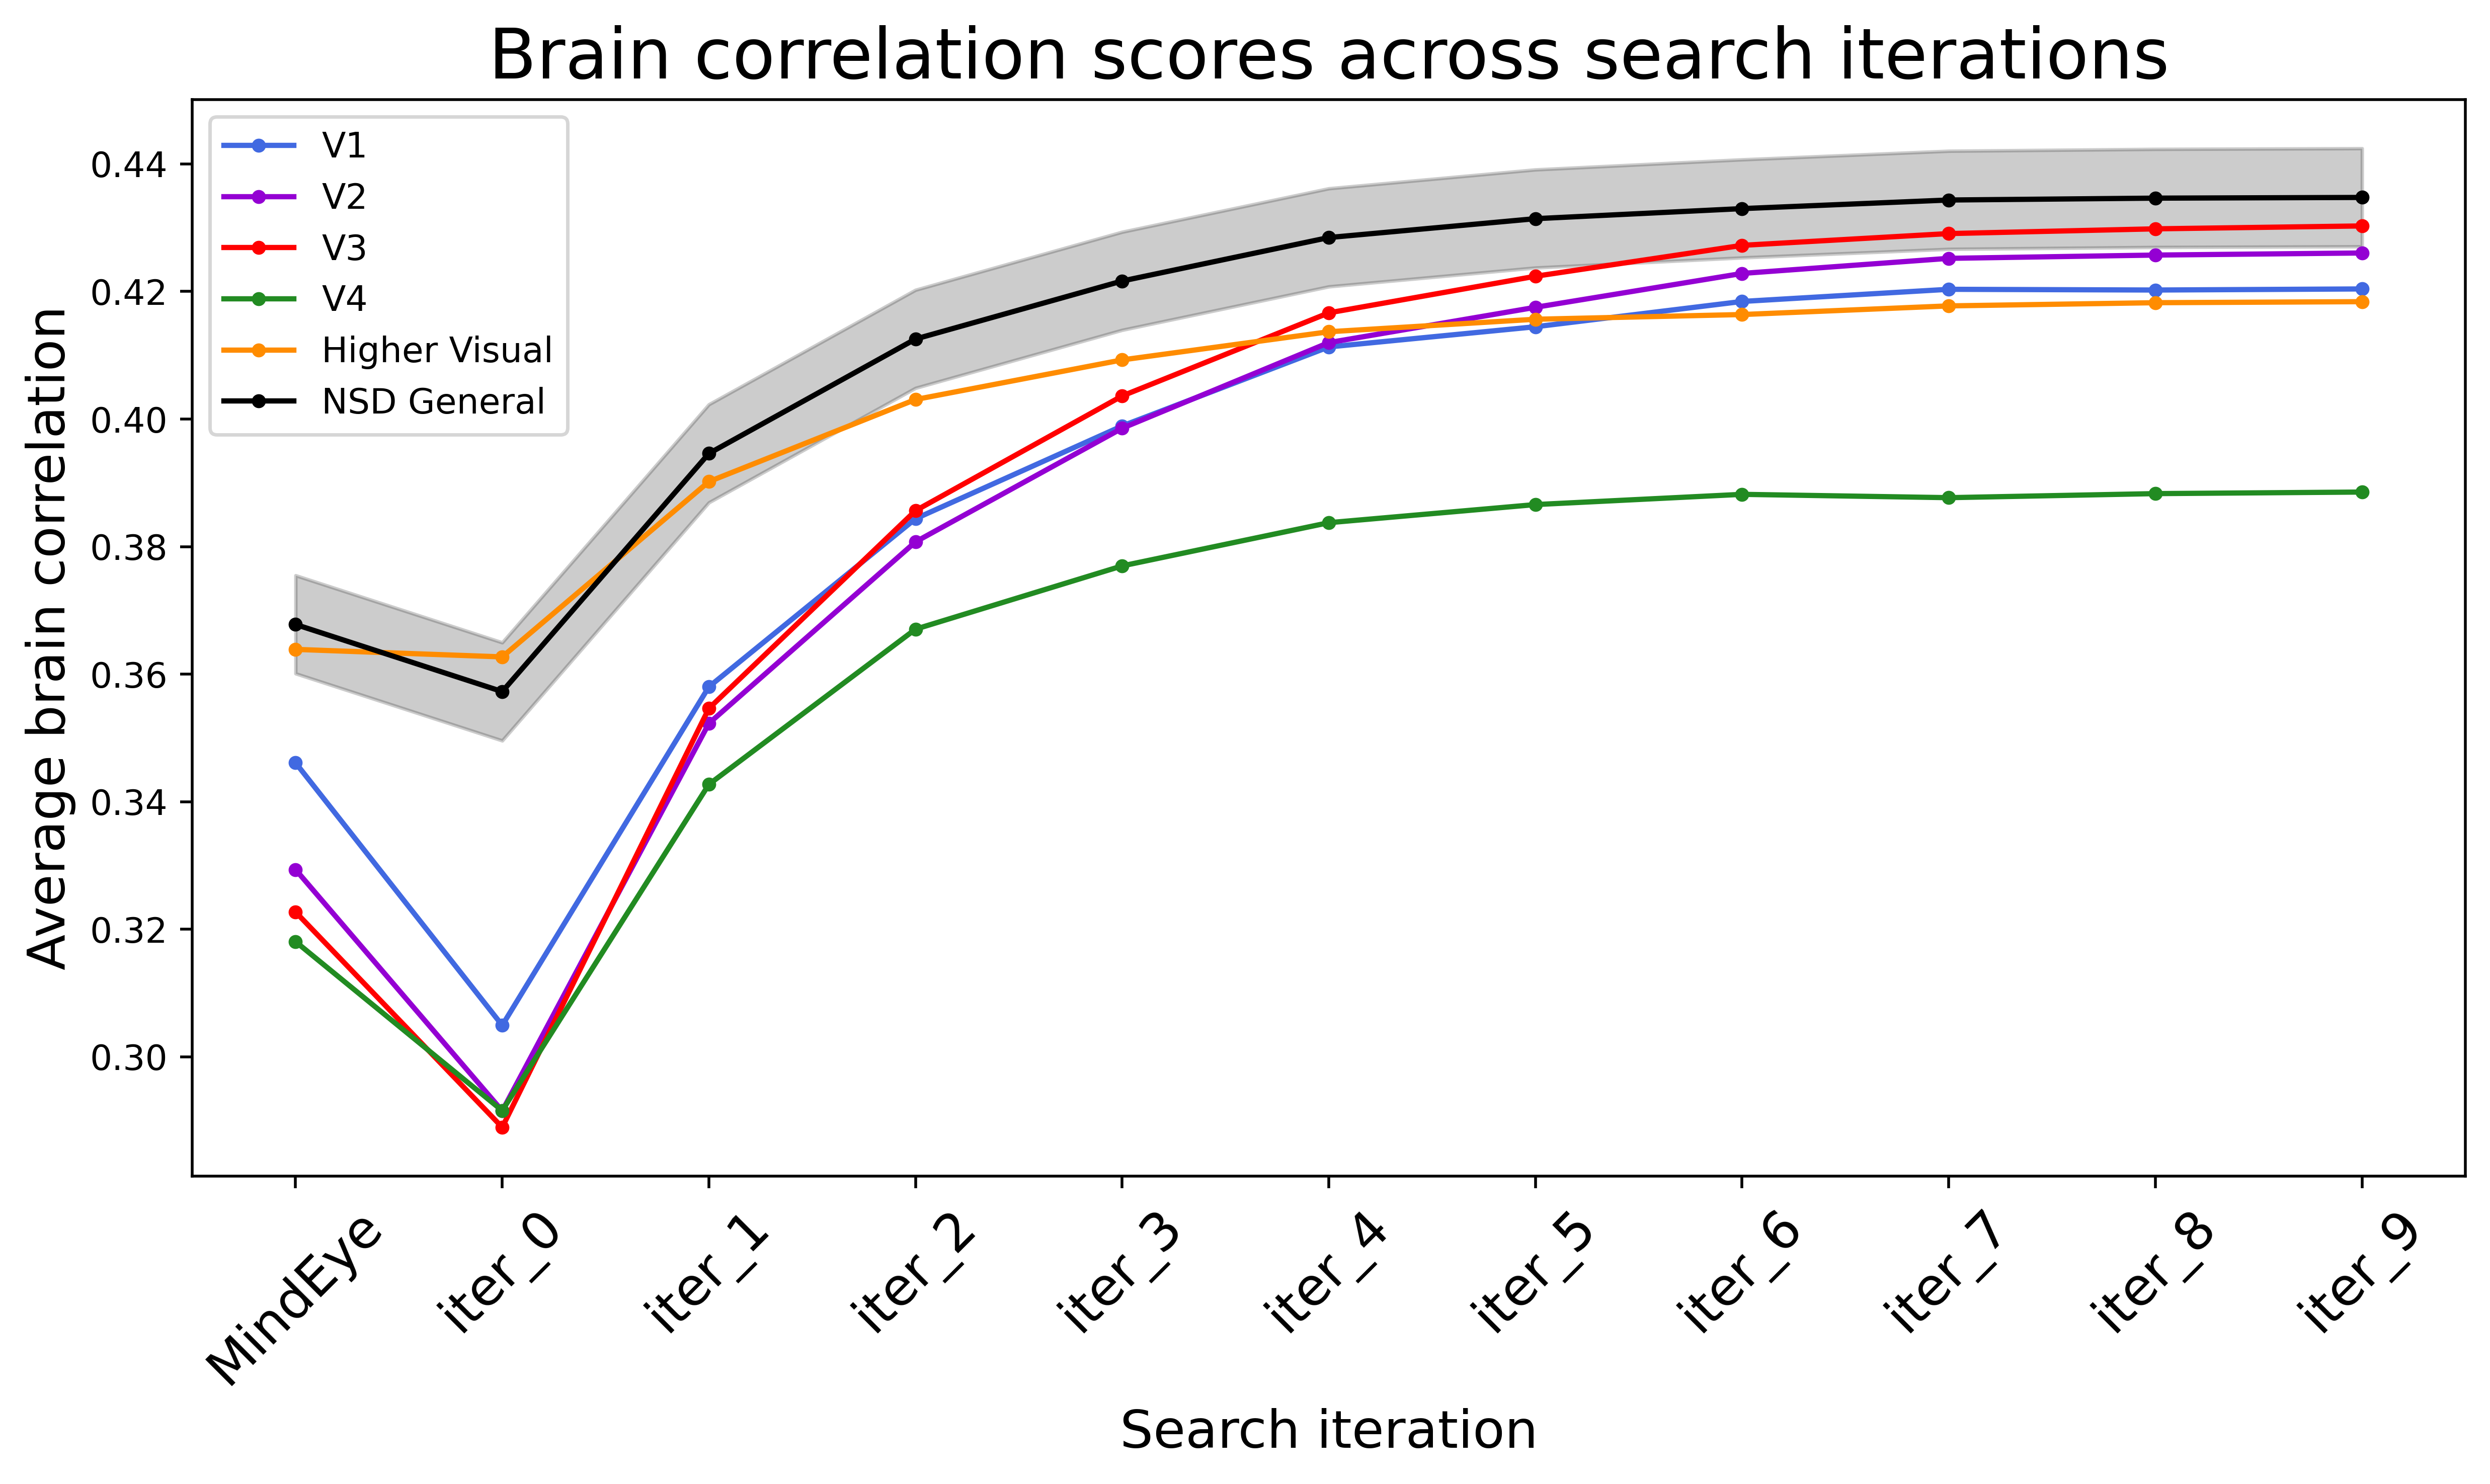

In [ ]:
folders = {
    "MindEye": 14, 
    "iter_0": 0, "iter_1": 1, "iter_2": 2, "iter_3": 3, 
    "iter_4": 4, "iter_5": 5, "iter_6": 6, "iter_7": 7, 
    "iter_8": 8, "iter_9" : 9
}

# Reset the dictionaries for storing the most recent values
unique_ids = df['ID'].unique()
most_recent_v1 = {uid: None for uid in unique_ids}
most_recent_v2 = {uid: None for uid in unique_ids}
most_recent_v3 = {uid: None for uid in unique_ids}
most_recent_v4 = {uid: None for uid in unique_ids}
most_recent_ev = {uid: None for uid in unique_ids}
most_recent_hv = {uid: None for uid in unique_ids}
most_recent_unmasked = {uid: None for uid in unique_ids}

# Define the update function
def update_most_recent_values(df, sample_indicator):
    for uid in unique_ids:
        # Get the most recent sample for each ID up to the current iteration
        relevant_samples = df[(df['ID'] == uid) & (df['Sample Indicator'] <= sample_indicator)]
        
        if not relevant_samples.empty:
            latest_sample_indicator = relevant_samples.loc[relevant_samples['Sample Indicator'].idxmax()]['Sample Indicator']
            latest_sample = relevant_samples.loc[relevant_samples['Sample Indicator'] == latest_sample_indicator]
            most_recent_v1[uid] = latest_sample['Brain Correlation V1'].mean()
            most_recent_v2[uid] = latest_sample['Brain Correlation V2'].mean()
            most_recent_v3[uid] = latest_sample['Brain Correlation V3'].mean()
            most_recent_v4[uid] = latest_sample['Brain Correlation V4'].mean()
            most_recent_ev[uid] = latest_sample['Brain Correlation Early Visual'].mean()
            most_recent_hv[uid] = latest_sample['Brain Correlation Higher Visual'].mean()
            most_recent_unmasked[uid] = latest_sample['Brain Correlation NSD General'].mean()

# Update values and calculate means for plotting
brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_ev = []
brain_correlation_hv = []
brain_correlation_unmasked = []



for folder in folders.values():
    update_most_recent_values(df, folder)
    brain_correlation_V1.append(np.mean(list(most_recent_v1.values())))
    brain_correlation_V2.append(np.mean(list(most_recent_v2.values())))
    brain_correlation_V3.append(np.mean(list(most_recent_v3.values())))
    brain_correlation_V4.append(np.mean(list(most_recent_v4.values())))
    brain_correlation_ev.append(np.mean(list(most_recent_ev.values())))
    brain_correlation_hv.append(np.mean(list(most_recent_hv.values())))
    brain_correlation_unmasked.append(np.mean(list(most_recent_unmasked.values())))

# Calculating confidence interval for NSD General
y_un = np.array(brain_correlation_unmasked)
ci_un = 0.95 * np.std(y_un) / math.sqrt(len(y_un))


# Plotting the corrected graph without 'iter_9'
plt.figure(figsize=(10, 6))
plt.plot(brain_correlation_V1, marker='.', label='V1', linewidth=1.5, color="royalblue")
plt.plot(brain_correlation_V2, marker='.', label='V2', linewidth=1.5, color="darkviolet")
plt.plot(brain_correlation_V3, marker='.', label='V3', linewidth=1.5, color="red")
plt.plot(brain_correlation_V4, marker='.', label='V4', linewidth=1.5, color="forestgreen")
plt.plot(brain_correlation_hv, marker='.', label='Higher Visual', linewidth=1.5, color="darkorange")
plt.plot(brain_correlation_unmasked, marker='.', label='NSD General', linewidth=1.5, color="black")

# Setting up x-ticks
plt.xticks(range(len(folders)), list(folders.keys()), rotation=45, fontsize=15)
plt.fill_between(range(len(folders)), (np.array(brain_correlation_unmasked) - np.array(ci_un)), 
                 (np.array(brain_correlation_unmasked) + np.array(ci_un)), color='black', alpha=.2)
plt.xlabel("Search iteration", fontsize=15)
plt.ylabel("Average brain correlation", fontsize=15)
plt.title("Brain correlation scores across search iterations", fontsize=20)
plt.legend()
plt.tight_layout()
mpl.rcParams['figure.dpi'] = 500
plt.show()


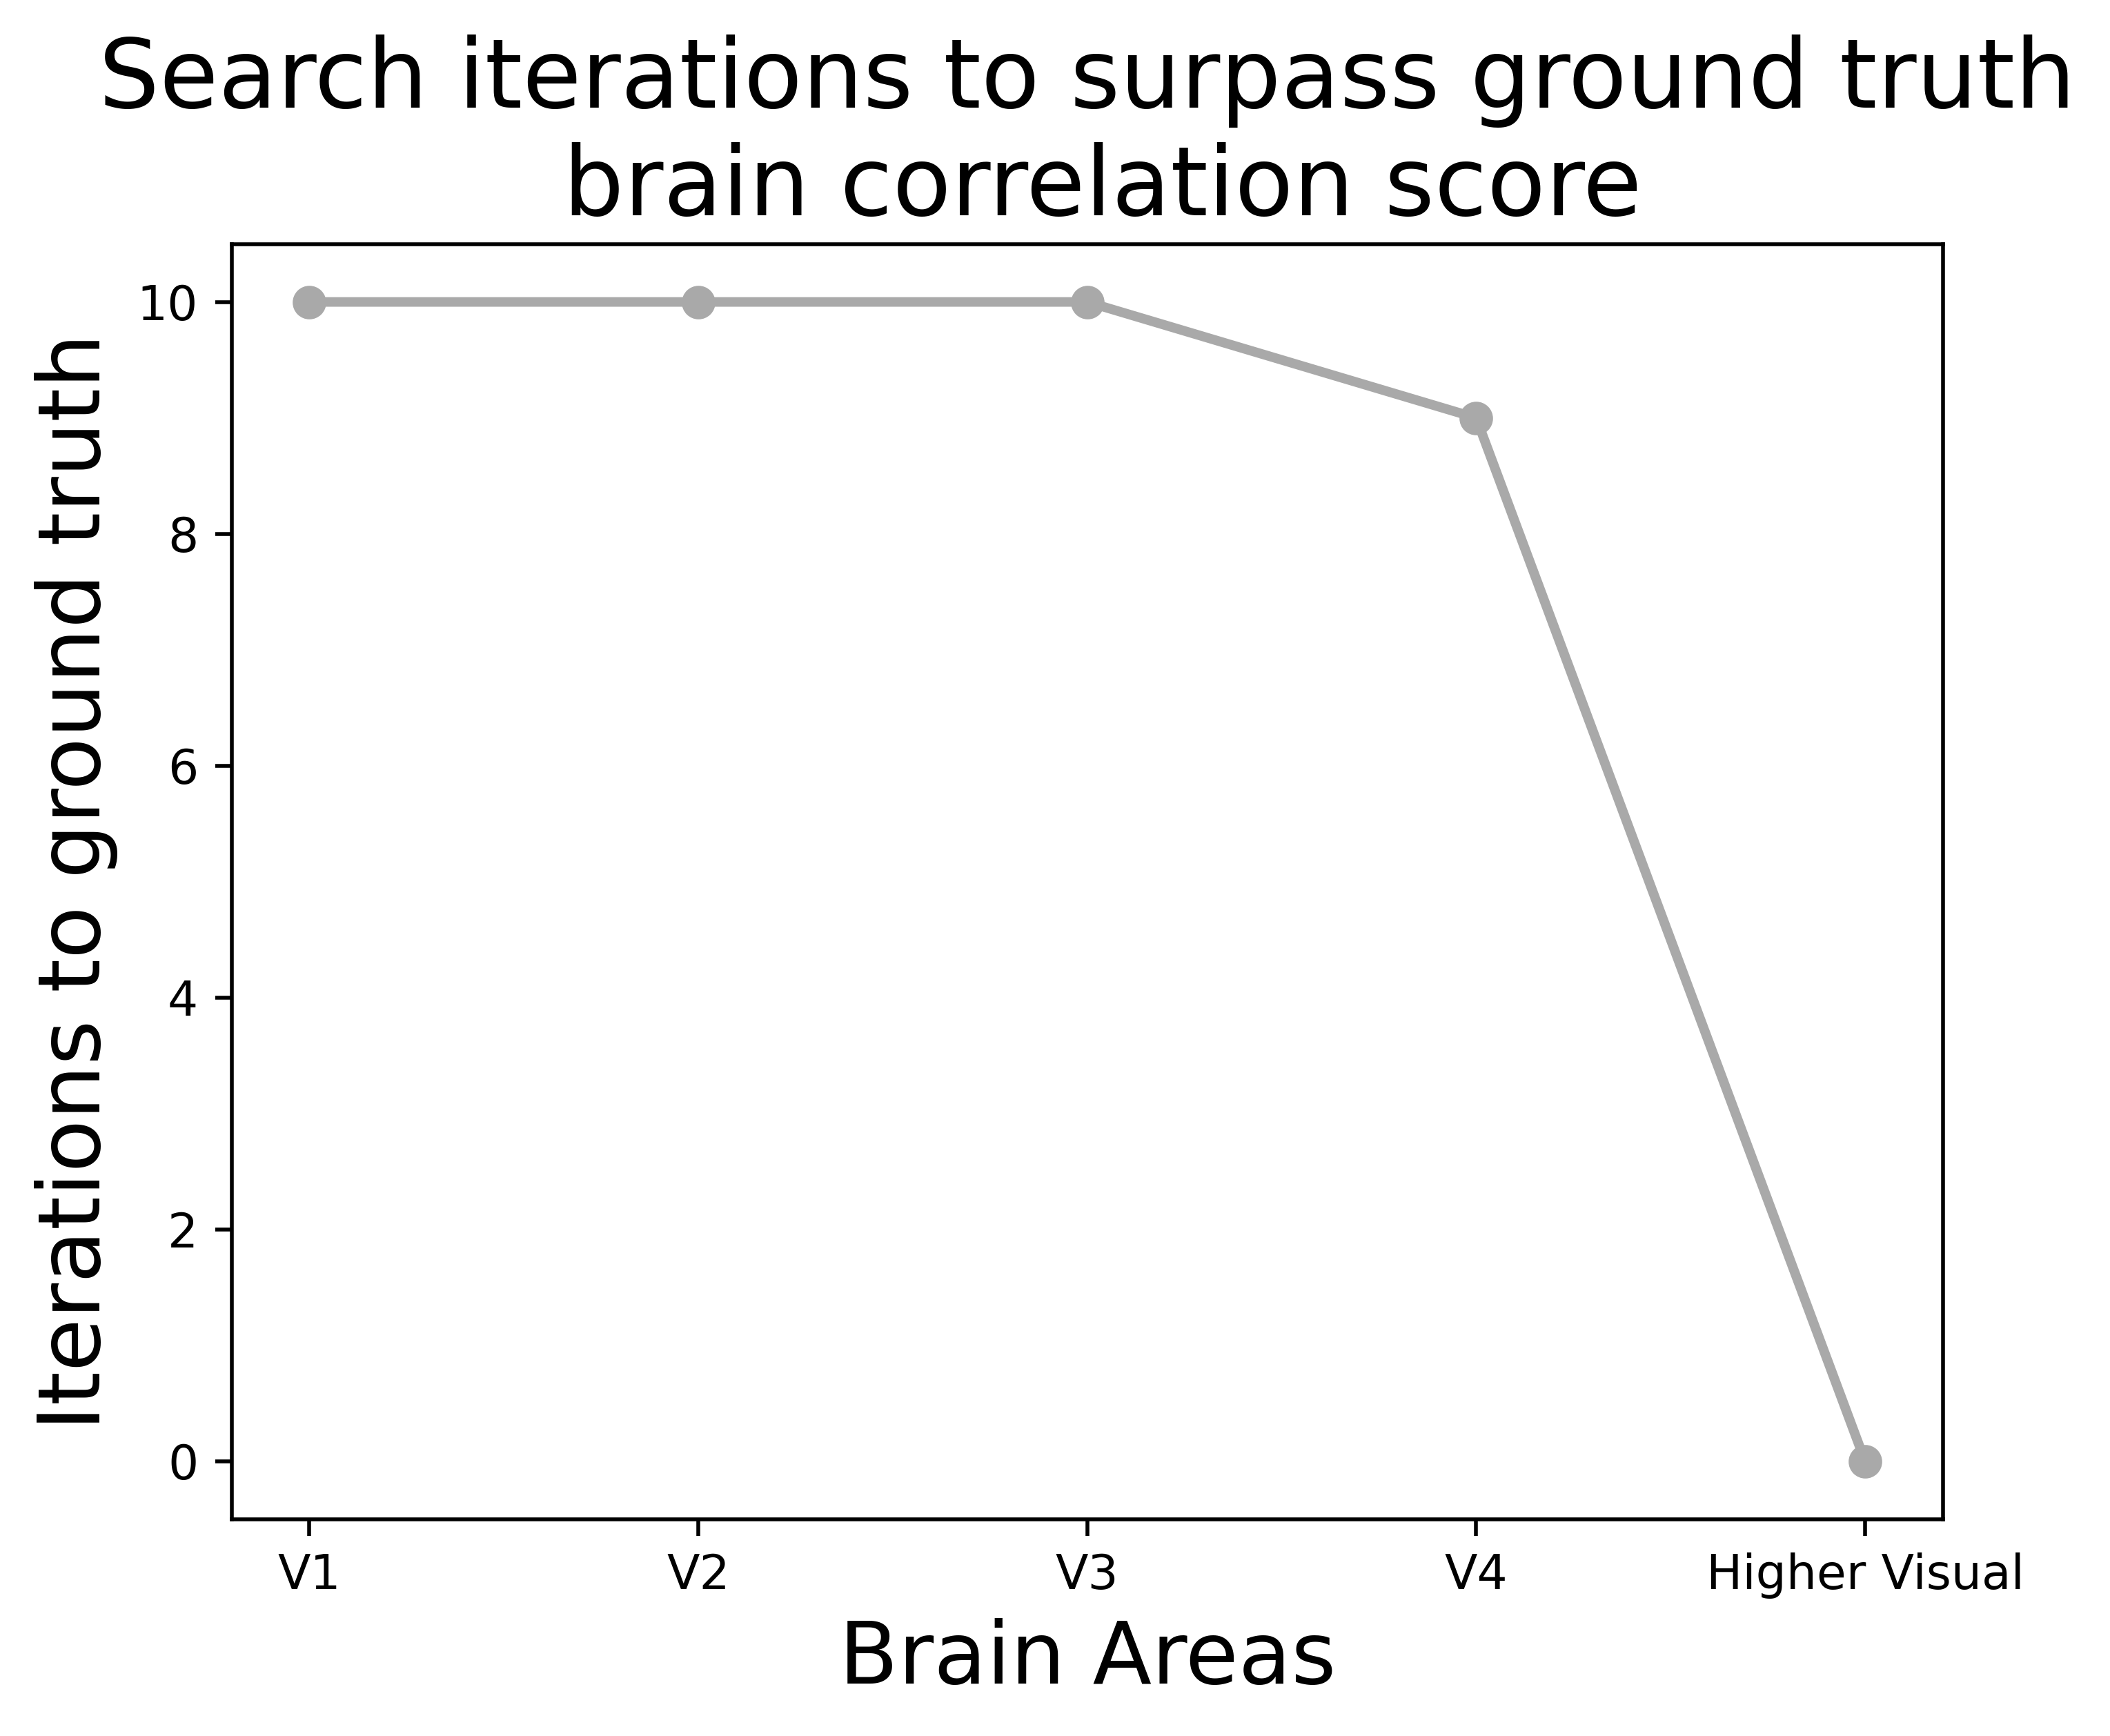

In [ ]:
# Search iterations to Ground Truth

x_iter_values = []

x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(9)
x_iter_values.append(0)

x_labels = ['V1', 'V2', 'V3', 'V4', 'Higher Visual']
x_axis = np.arange(len(x_labels))
# y_labels = ["0", "2", "4", "6", "8", "10 >="]
# y_axis = np.arange(len(y_labels))

# x_iter_values.append(0)
# x_iter_values.append(x_v4)
# x_iter_values.append(x_v3)
# x_iter_values.append(x_v2)
# x_iter_values.append(9)

# x_labels = ['Higher Visual', 'V4', 'V3', 'V2', 'V1']
plt.xticks(x_axis, x_labels)
# plt.yticks(y_axis, y_labels)
plt.plot(x_iter_values, marker='o', linewidth=2, color = "darkgray")
plt.xlabel("Brain Areas", fontsize=18)
plt.ylabel("Iterations to ground truth", fontsize=18)
plt.title("Search iterations to surpass ground truth\n brain correlation score", fontsize=20)
mpl.rcParams['figure.dpi'] = 300

In [ ]:
# Full code to generate the requested plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm.auto import tqdm

# Define the folders (iterations)
folders = {"MindEye": 14,
    "iter_0": 0, "iter_1": 1, "iter_2": 2, "iter_3": 3, 
    "iter_4": 4, "iter_5": 5, "iter_6": 6, "iter_7": 7, 
    "iter_8": 8, "iter_9": 9
}

# Initialize dictionaries to hold the count of samples that exceed the ground truth
brain_regions = ['V1', 'V2', 'V3', 'V4', 'Higher Visual', 'NSD General']
# Full code to generate the requested bar plot with cumulative counts

# Get ground truth data for each sample and subject
ground_truth_data = df[df['Sample Indicator'] == 10]

# Initialize a dictionary to store counts for each iteration and brain region
counts = {region: {iteration: 0 for iteration in folders} for region in brain_regions}

# Iterate over each subject and sample to compute cumulative counts
for subject in ground_truth_data['Subject'].unique():
    for sample_id in ground_truth_data['ID'].unique():
        # Get ground truth correlations for the sample and subject
        ground_truth = ground_truth_data[
            (ground_truth_data['Subject'] == subject) &
            (ground_truth_data['ID'] == sample_id)
        ]

        # Skip if no ground truth data is present for the sample and subject
        if ground_truth.empty:
            continue

        # Store ground truth correlations for all regions
        gt_correlations = {region: ground_truth[f'Brain Correlation {region}'].values[0] for region in brain_regions}

        # Iterate over each iteration and count samples exceeding ground truth
        for iteration, indicator in folders.items():
            # Get iteration data for the current and previous iterations
            if indicator == 14:
                iteration_data = df[
                    (df['Subject'] == subject) &
                    (df['ID'] == sample_id) &
                    (df['Sample Indicator'] == indicator)
                ]
            else:
                iteration_data = df[
                    (df['Subject'] == subject) &
                    (df['ID'] == sample_id) &
                    (df['Sample Indicator'] <= indicator)
                ]
            latest_sample_indicator = iteration_data.loc[iteration_data['Sample Indicator'].idxmax()]['Sample Indicator']
            iteration_data = iteration_data.loc[iteration_data['Sample Indicator'] == latest_sample_indicator]

            # Calculate the mean correlations for each region up to the current iteration
            mean_correlations = {region: iteration_data[f'Brain Correlation {region}'].mean() for region in brain_regions}

            # Increment count if the mean correlation exceeds the ground truth
            for region in brain_regions:
                if mean_correlations[region] > gt_correlations[region]:
                    counts[region][iteration] += 1

iterations = [[counts[region][iteration]/(982*4) * 100 for region in brain_regions] for iteration in folders.keys()]





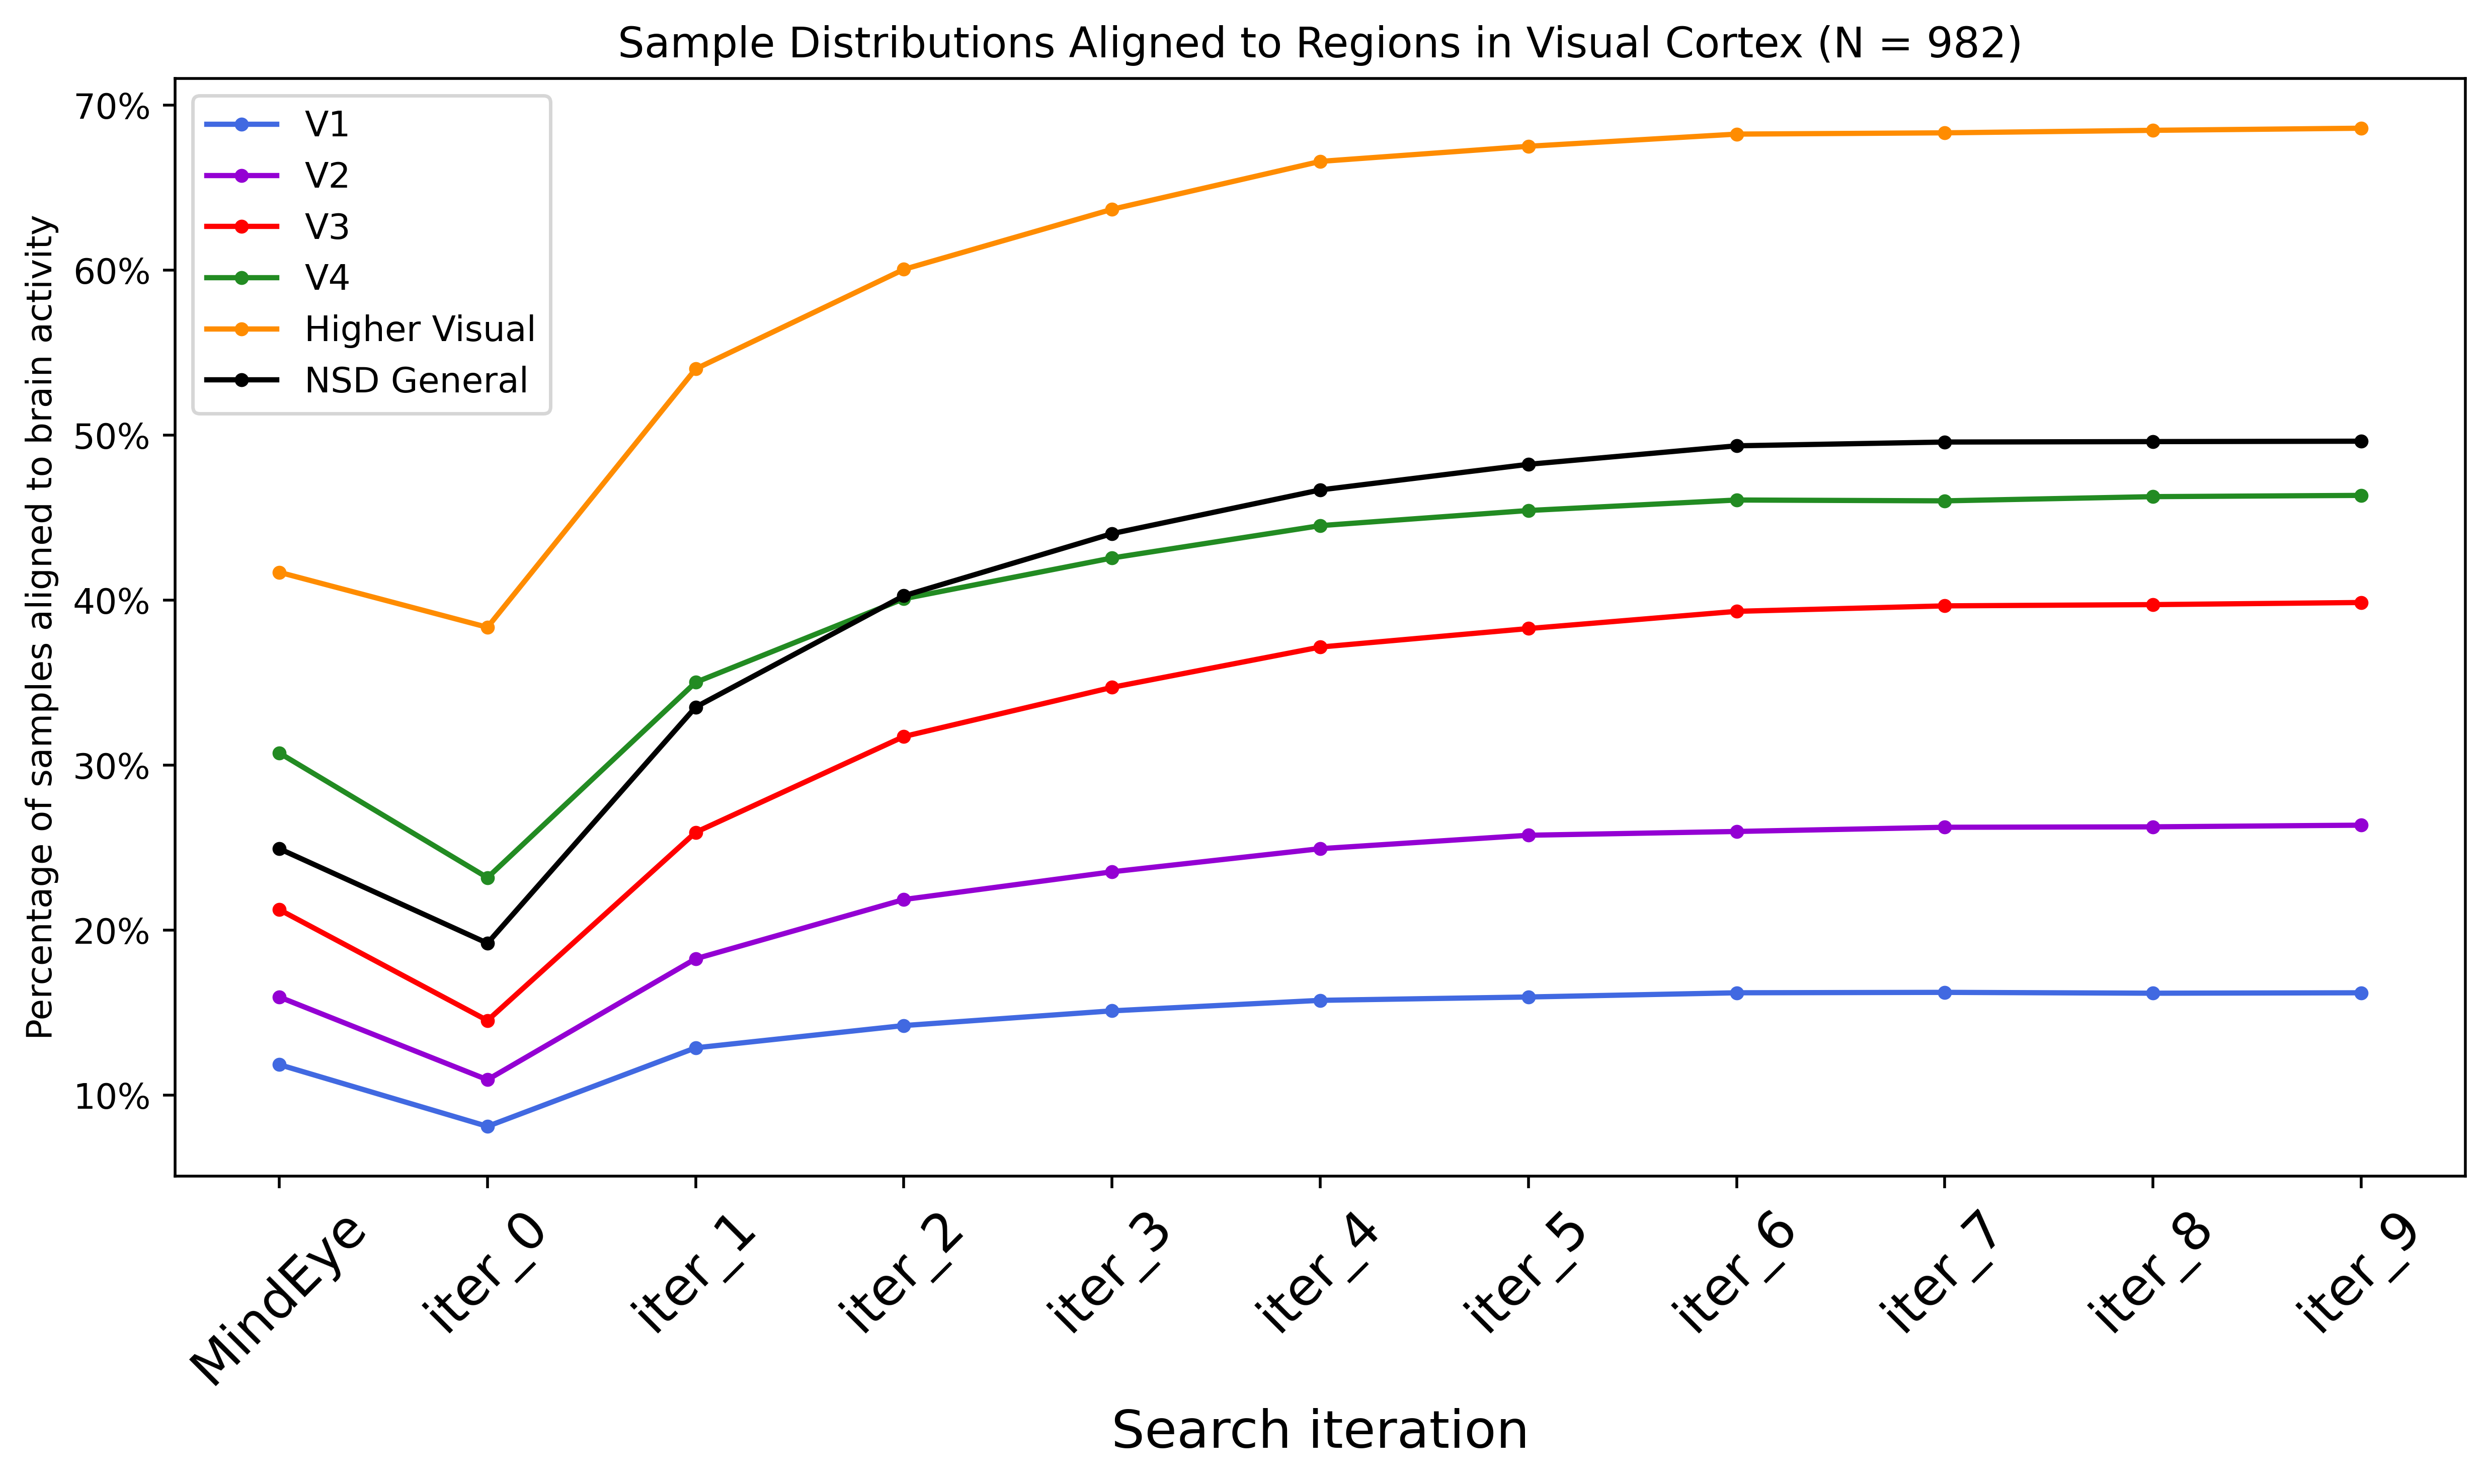

In [ ]:
brain_regions = ['V1', 'V2', 'V3', 'V4', 'Higher Visual', 'NSD General']
# Plotting the corrected graph without 'iter_9'
plt.figure(figsize=(10, 6))
plt.plot([x/(982*4) * 100 for x in counts['V1'].values()], marker='.', label='V1', linewidth=1.5, color="royalblue")
plt.plot([x/(982*4) * 100 for x in counts['V2'].values()], marker='.', label='V2', linewidth=1.5, color="darkviolet")
plt.plot([x/(982*4) * 100 for x in counts['V3'].values()], marker='.', label='V3', linewidth=1.5, color="red")
plt.plot([x/(982*4) * 100 for x in counts['V4'].values()], marker='.', label='V4', linewidth=1.5, color="forestgreen")
plt.plot([x/(982*4) * 100 for x in counts['Higher Visual'].values()], marker='.', label='Higher Visual', linewidth=1.5, color="darkorange")
plt.plot([x/(982*4) * 100 for x in counts['NSD General'].values()], marker='.', label='NSD General', linewidth=1.5, color="black")

# Setting up x-ticks
plt.xticks(range(len(folders)), list(folders.keys()), rotation=45, fontsize=15)
plt.xlabel("Search iteration", fontsize=15)
plt.ylabel("Percentage of samples aligned to brain activity")
plt.title("Sample Distributions Aligned to Regions in Visual Cortex (N = 982)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(100))
plt.legend()
plt.tight_layout()
mpl.rcParams['figure.dpi'] = 500
plt.show()

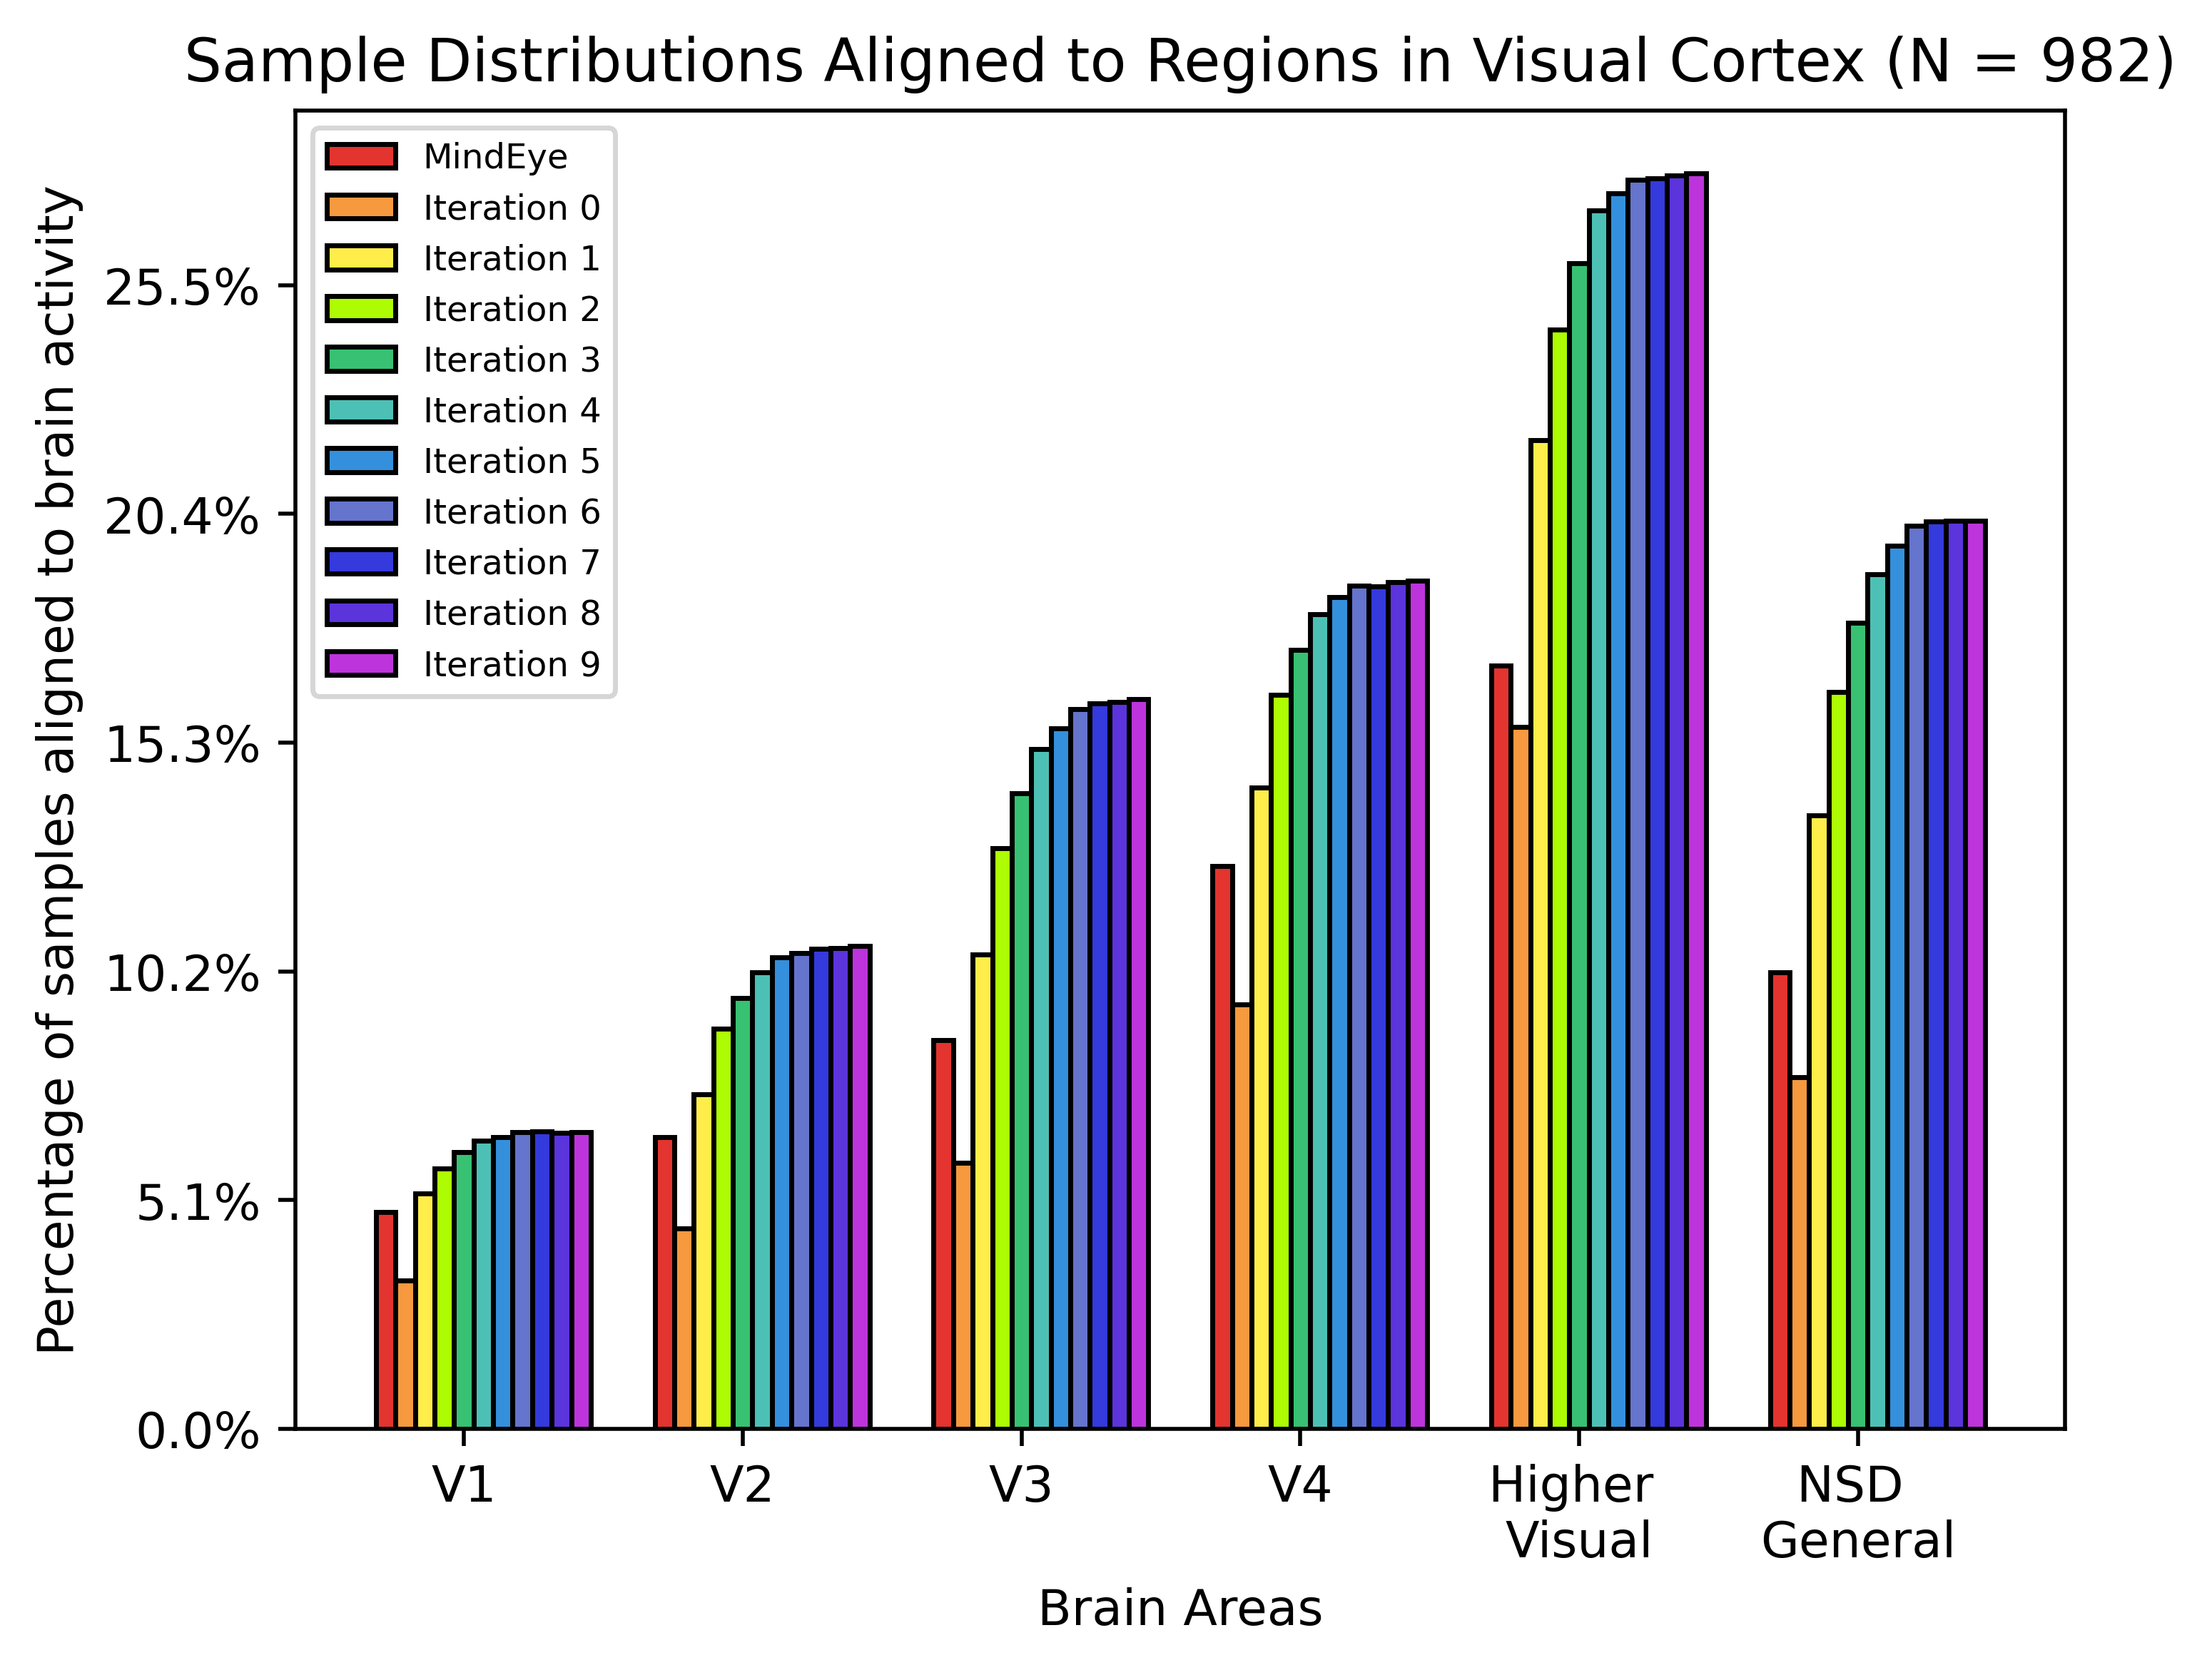

In [ ]:
x = ["V1", "V2", "V3", "V4", "Higher \nVisual", "NSD \nGeneral"]
x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.07

plt.bar(r - width * 4, iterations[0], color = '#e3342f',
        width = width, edgecolor = 'black',
        label='MindEye')
plt.bar(r - width * 3, iterations[1], color = '#f6993f',
        width = width, edgecolor = 'black',
        label='Iteration 0')
plt.bar(r - width * 2, iterations[2], color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='Iteration 1')
plt.bar(r - width, iterations[3], color = '#adfc03',
        width = width, edgecolor = 'black',
        label='Iteration 2')
plt.bar(r, iterations[4], color = '#38c172',
        width = width, edgecolor = 'black',
        label='Iteration 3')
plt.bar(r + width, iterations[5], color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='Iteration 4')
plt.bar(r + width * 2, iterations[6], color = '#3490dc',
        width = width, edgecolor = 'black',
        label='Iteration 5')
plt.bar(r + width * 3, iterations[7], color = '#6574cd',
        width = width, edgecolor = 'black',
        label='Iteration 6')
plt.bar(r + width * 4, iterations[8], color = '#343adc',
        width = width, edgecolor = 'black',
        label='Iteration 7')
plt.bar(r + width * 5, iterations[9], color = '#5b34dc',
        width = width, edgecolor = 'black',
        label='Iteration 8')
plt.bar(r + width * 6, iterations[10], color = '#bd34dc',
        width = width, edgecolor = 'black',
        label='Iteration 9')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Percentage of samples aligned to brain activity")
plt.title("Sample Distributions Aligned to Regions in Visual Cortex (N = 982)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(982))
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()

In [ ]:

folders = {
    "MindEye": 14, 
    "iter_0": 0, "iter_1": 1, "iter_2": 2, "iter_3": 3, 
    "iter_4": 4, "iter_5": 5, "iter_6": 6, "iter_7": 7, 
    "iter_8": 8, "iter_9" : 9
}

# Reset the dictionaries for storing the most recent values
unique_ids = df['ID'].unique()
most_recent_v1 = {uid: None for uid in unique_ids}
most_recent_v2 = {uid: None for uid in unique_ids}
most_recent_v3 = {uid: None for uid in unique_ids}
most_recent_v4 = {uid: None for uid in unique_ids}
most_recent_ev = {uid: None for uid in unique_ids}
most_recent_hv = {uid: None for uid in unique_ids}
most_recent_unmasked = {uid: None for uid in unique_ids}

# Define the update function
def update_most_recent_values(df, sample_indicator):
    for uid in unique_ids:
        # Get the most recent sample for each ID up to the current iteration
        relevant_samples = df[(df['ID'] == uid) & (df['Sample Indicator'] == sample_indicator)]
        
        if not relevant_samples.empty:
            latest_sample_indicator = relevant_samples['Sample Indicator'].max()
            latest_sample = relevant_samples.loc[relevant_samples['Sample Indicator'] == latest_sample_indicator]
            most_recent_v1[uid] = latest_sample['Beta Prime Variance V1'].mean()
            most_recent_v2[uid] = latest_sample['Beta Prime Variance V2'].mean()
            most_recent_v3[uid] = latest_sample['Beta Prime Variance V3'].mean()
            most_recent_v4[uid] = latest_sample['Beta Prime Variance V4'].mean()
            most_recent_ev[uid] = latest_sample['Beta Prime Variance Early Visual'].mean()
            most_recent_hv[uid] = latest_sample['Beta Prime Variance Higher Visual'].mean()
            most_recent_unmasked[uid] = latest_sample['Beta Prime Variance NSD General'].mean()

# Update values and calculate means for plotting
brain_variance_V1 = []
brain_variance_V2 = []
brain_variance_V3 = []
brain_variance_V4 = []
brain_variance_ev = []
brain_variance_hv = []
brain_variance_unmasked = []



for folder in folders.values():
    update_most_recent_values(df, folder)
    brain_variance_V1.append(np.mean(list(most_recent_v1.values())))
    brain_variance_V2.append(np.mean(list(most_recent_v2.values())))
    brain_variance_V3.append(np.mean(list(most_recent_v3.values())))
    brain_variance_V4.append(np.mean(list(most_recent_v4.values())))
    brain_variance_ev.append(np.mean(list(most_recent_ev.values())))
    brain_variance_hv.append(np.mean(list(most_recent_hv.values())))
    brain_variance_unmasked.append(np.mean(list(most_recent_unmasked.values())))
    
brain_regions = ['V1', 'V2', 'V3', 'V4', 'Higher Visual', 'NSD General']
variance = [brain_variance_V1, brain_variance_V2, brain_variance_V3, brain_variance_V4, brain_variance_hv, brain_variance_unmasked]
variance = list(zip(*variance))
# iterations = [[counts[region][iteration] for region in brain_regions] for iteration in folders.keys()]


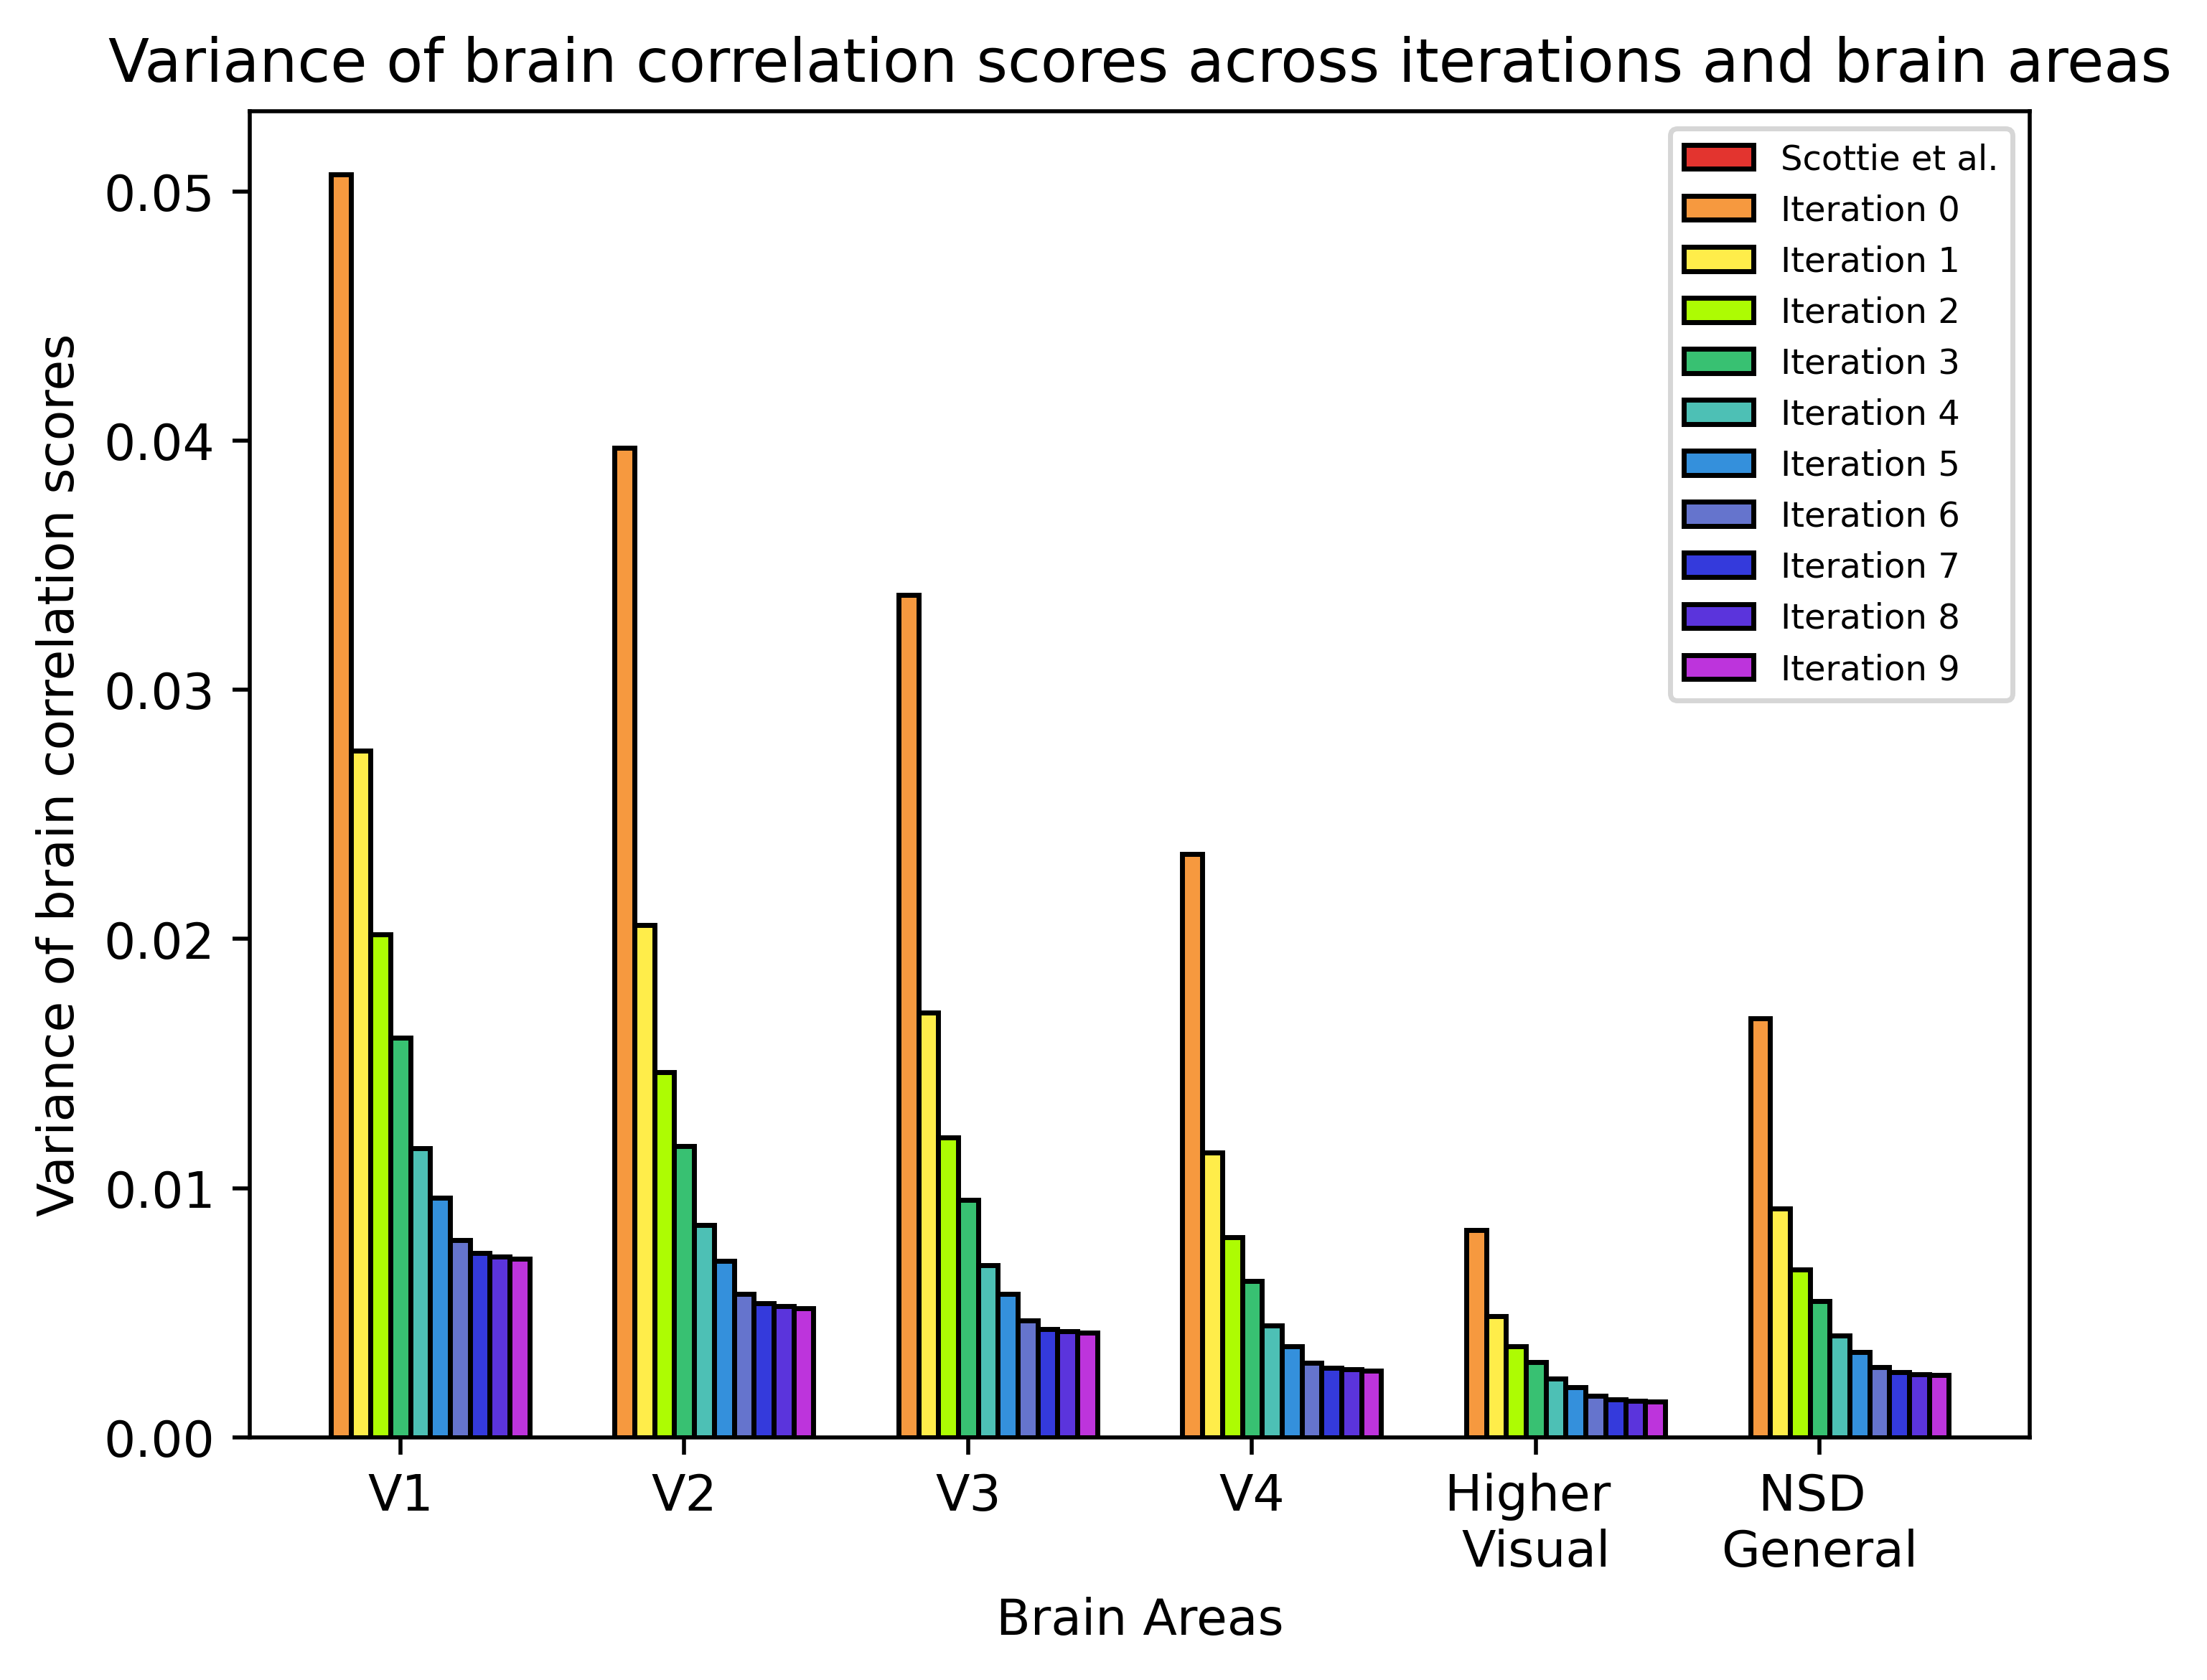

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(brain_correlation_V1, marker='.', label='V1', linewidth=1, color="royalblue")
# plt.plot(brain_correlation_V2, marker='.', label='V2', linewidth=1, color="darkviolet")
# plt.plot(brain_correlation_V3, marker='.', label='V3', linewidth=1, color="red")
# plt.plot(brain_correlation_V4, marker='.', label='V4', linewidth=1, color="forestgreen")
# plt.plot(brain_correlation_hv, marker='.', label='Higher Visual', linewidth=1, color="darkorange")
# plt.plot(brain_correlation_unmasked, marker='.', label='NSD General', linewidth=1, color="black")

# # Setting up x-ticks
# plt.xticks(range(len(folders)), list(folders.keys()), rotation=45, fontsize=15)
# plt.fill_between(range(len(folders)), (np.array(brain_correlation_unmasked) - np.array(ci_un)), 
#                  (np.array(brain_correlation_unmasked) + np.array(ci_un)), color='black', alpha=.2)
# plt.xlabel("Search iteration", fontsize=15)
# plt.ylabel("Average brain correlation", fontsize=15)
# plt.title("Brain correlation scores across search iterations", fontsize=20)
# plt.legend()
# plt.tight_layout()
# mpl.rcParams['figure.dpi'] = 500
# plt.show()

x = ["V1", "V2", "V3", "V4", "Higher \nVisual", "NSD \nGeneral"]
x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.07

plt.bar(r - width * 4, variance[0], color = '#e3342f',
        width = width, edgecolor = 'black',
        label='MindEye')
plt.bar(r - width * 3, variance[1], color = '#f6993f',
        width = width, edgecolor = 'black',
        label='Iteration 0')
plt.bar(r - width * 2, variance[2], color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='Iteration 1')
plt.bar(r - width, variance[3], color = '#adfc03',
        width = width, edgecolor = 'black',
        label='Iteration 2')
plt.bar(r, variance[4], color = '#38c172',
        width = width, edgecolor = 'black',
        label='Iteration 3')
plt.bar(r + width, variance[5], color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='Iteration 4')
plt.bar(r + width * 2, variance[6], color = '#3490dc',
        width = width, edgecolor = 'black',
        label='Iteration 5')
plt.bar(r + width * 3, variance[7], color = '#6574cd',
        width = width, edgecolor = 'black',
        label='Iteration 6')
plt.bar(r + width * 4, variance[8], color = '#343adc',
        width = width, edgecolor = 'black',
        label='Iteration 7')
plt.bar(r + width * 5, variance[9], color = '#5b34dc',
        width = width, edgecolor = 'black',
        label='Iteration 8')
plt.bar(r + width * 6, variance[10], color = '#bd34dc',
        width = width, edgecolor = 'black',
        label='Iteration 9')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Variance of brain correlation scores")
plt.title("Variance of brain correlation scores across iterations and brain areas")
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()

In [53]:
# Add mindeye variance numbers


def get_iter_variance(iter_path, masks):
    var_dict_path = os.path.join(iter_path, 'variance.pkl')
    
    # Check if the variance dictionary file exists
    # if os.path.exists(var_dict_path):
    #     # Load and return the existing variance dictionary
    #     with open(var_dict_path, 'rb') as f:
    #         var_dict = pickle.load(f)
    #     return var_dict

    beta_primes = []
    var_dict = {}
    
    for mask_name in masks.keys():
        var_dict[mask_name] = []
    beta_primes = []
    for file in os.listdir(iter_path):
        if ".pt" in file:
            beta_primes.append(torch.load(f"{iter_path}/{file}"))
    beta_primes = torch.stack(beta_primes)
    for mask_name, mask in masks.items():
        var_dict[mask_name].append(bootstrap_variance(beta_primes[:, mask], n_iterations=100))
    for mask_name in masks:
        var_dict[mask_name] = np.mean(var_dict[mask_name])
    
    # Save the variance dictionary to a file
    with open(var_dict_path, 'wb') as f:
        pickle.dump(var_dict, f)
    # print(f"Variance calculation took {time.time() - start} seconds")
    return var_dict

In [59]:
# Full code to generate the requested plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm.auto import tqdm

# Define the folders (iterations)
folders = {"MindEye": 14,
    "iter_0": 0, "iter_1": 1, "iter_2": 2, "iter_3": 3, 
    "iter_4": 4, "iter_5": 5, "iter_6": 6, "iter_7": 7, 
    "iter_8": 8, "iter_9": 9
}

# Initialize dictionaries to hold the count of samples that exceed the ground truth
brain_regions = ['V1', 'V2', 'V3', 'V4', 'Higher Visual', 'NSD General']
# Full code to generate the requested bar plot with cumulative counts

# Get ground truth data for each sample and subject

# Initialize a dictionary to store counts for each iteration and brain region
counts = {region: {iteration: 0 for iteration in folders} for region in brain_regions}

# Iterate over each subject and sample to compute cumulative counts
for subject in df['Subject'].unique():
    mask_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/data/preprocessed_data/subject{}/masks/".format(subject)
    subject_sizes = [0, 15724, 14278, 0, 0, 13039, 0, 12682]
    masks = {"NSD General":torch.full((subject_sizes[subject],), True),
            "V1":torch.load(mask_path + "V1.pt"),
            "V2":torch.load(mask_path + "V2.pt"),
            "V3":torch.load(mask_path + "V3.pt"),
            "V4":torch.load(mask_path + "V4.pt"),
            "Higher Visual":torch.load(mask_path + "higher_vis.pt")}  
    for sample_id in df['ID'].unique():
        # Iterate over each iteration and count samples exceeding ground truth
        for iteration, indicator in folders.items():
            # Get iteration data for the current iterations
            if indicator == 14:
                iteration_data = df[
                    (df['Subject'] == subject) &
                    (df['ID'] == sample_id) &
                    (df['Sample Indicator'] == indicator)
                ]
            else:
                iteration_data = df[
                    (df['Subject'] == subject) &
                    (df['ID'] == sample_id) &
                    (df['Sample Indicator'] <= indicator)
                ]
            latest_sample_indicator = iteration_data['Sample Indicator'].max()
            iteration_data = iteration_data.loc[iteration_data['Sample Indicator'] == latest_sample_indicator]
            
            # Calculate the mean correlations for each region up to the current iteration
            target_variance = {region: iteration_data[f'Target Variance {region}'].mean() for region in brain_regions}
            if iteration != "MindEye":
                mean_variance = {region: iteration_data[f'Beta Prime Variance {region}'].mean() for region in brain_regions}
            else:
                iter_variance_dict = get_iter_variance(f'/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mindeye_nsd_vision/subject{subject}/{sample_id}/', masks)
                mean_variance = {region: iter_variance_dict[region] for region in brain_regions}
            

            # Increment count if the mean correlation exceeds the ground truth
            for region in brain_regions:
                if mean_variance[region] <= target_variance[region]:
                    counts[region][iteration] += 1
                # elif region == "NSD General" and iteration == "iter_9":
                #     print("NSD General: ", mean_variance[region], target_variance[region])

thresholds = [[counts[region][iteration]/(982*4) * 100 for region in brain_regions] for iteration in folders.keys()]





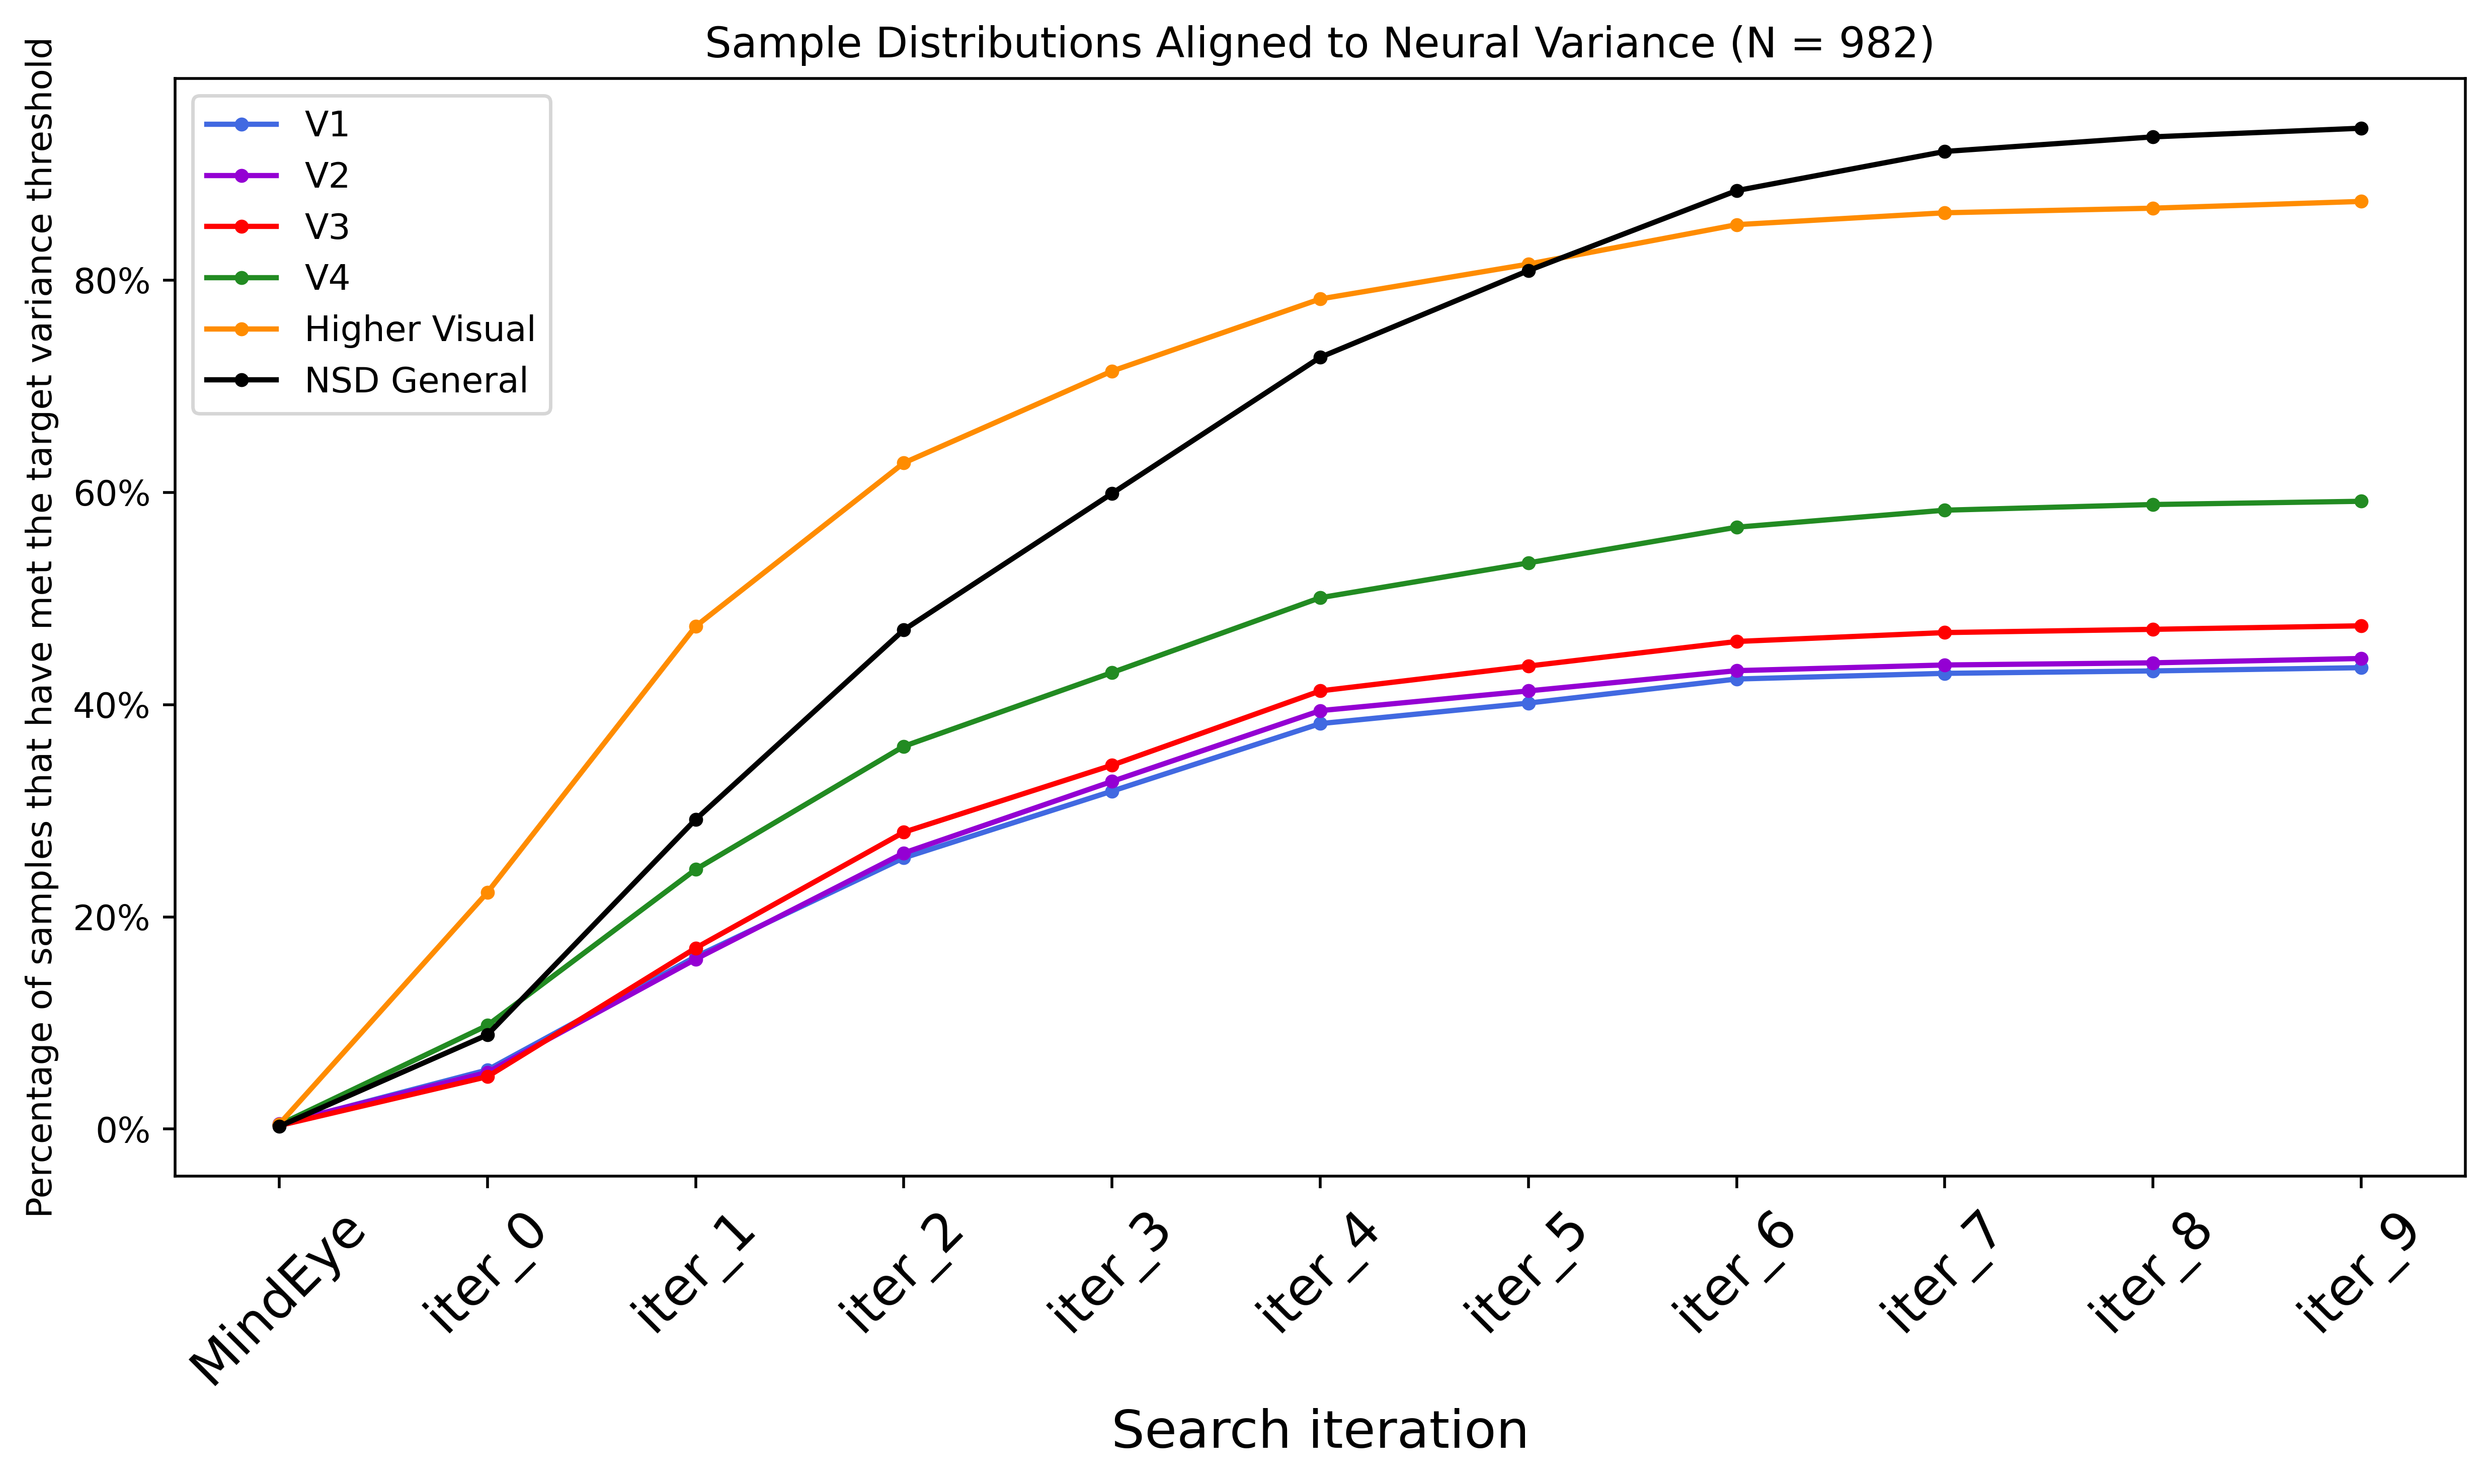

In [65]:
brain_regions = ['V1', 'V2', 'V3', 'V4', 'Higher Visual', 'NSD General']
# Plotting the corrected graph without 'iter_9'
plt.figure(figsize=(10, 6))
plt.plot([x/(982*4) * 100 for x in counts['V1'].values()], marker='.', label='V1', linewidth=1.5, color="royalblue")
plt.plot([x/(982*4) * 100 for x in counts['V2'].values()], marker='.', label='V2', linewidth=1.5, color="darkviolet")
plt.plot([x/(982*4) * 100 for x in counts['V3'].values()], marker='.', label='V3', linewidth=1.5, color="red")
plt.plot([x/(982*4) * 100 for x in counts['V4'].values()], marker='.', label='V4', linewidth=1.5, color="forestgreen")
plt.plot([x/(982*4) * 100 for x in counts['Higher Visual'].values()], marker='.', label='Higher Visual', linewidth=1.5, color="darkorange")
plt.plot([x/(982*4) * 100 for x in counts['NSD General'].values()], marker='.', label='NSD General', linewidth=1.5, color="black")

# Setting up x-ticks
plt.xticks(range(len(folders)), list(folders.keys()), rotation=45, fontsize=15)
plt.xlabel("Search iteration", fontsize=15)
plt.ylabel("Percentage of samples that have met the target variance threshold")
plt.title("Sample Distributions Aligned to Neural Variance (N = 982)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(100))
plt.legend()
plt.tight_layout()
mpl.rcParams['figure.dpi'] = 500
plt.show()

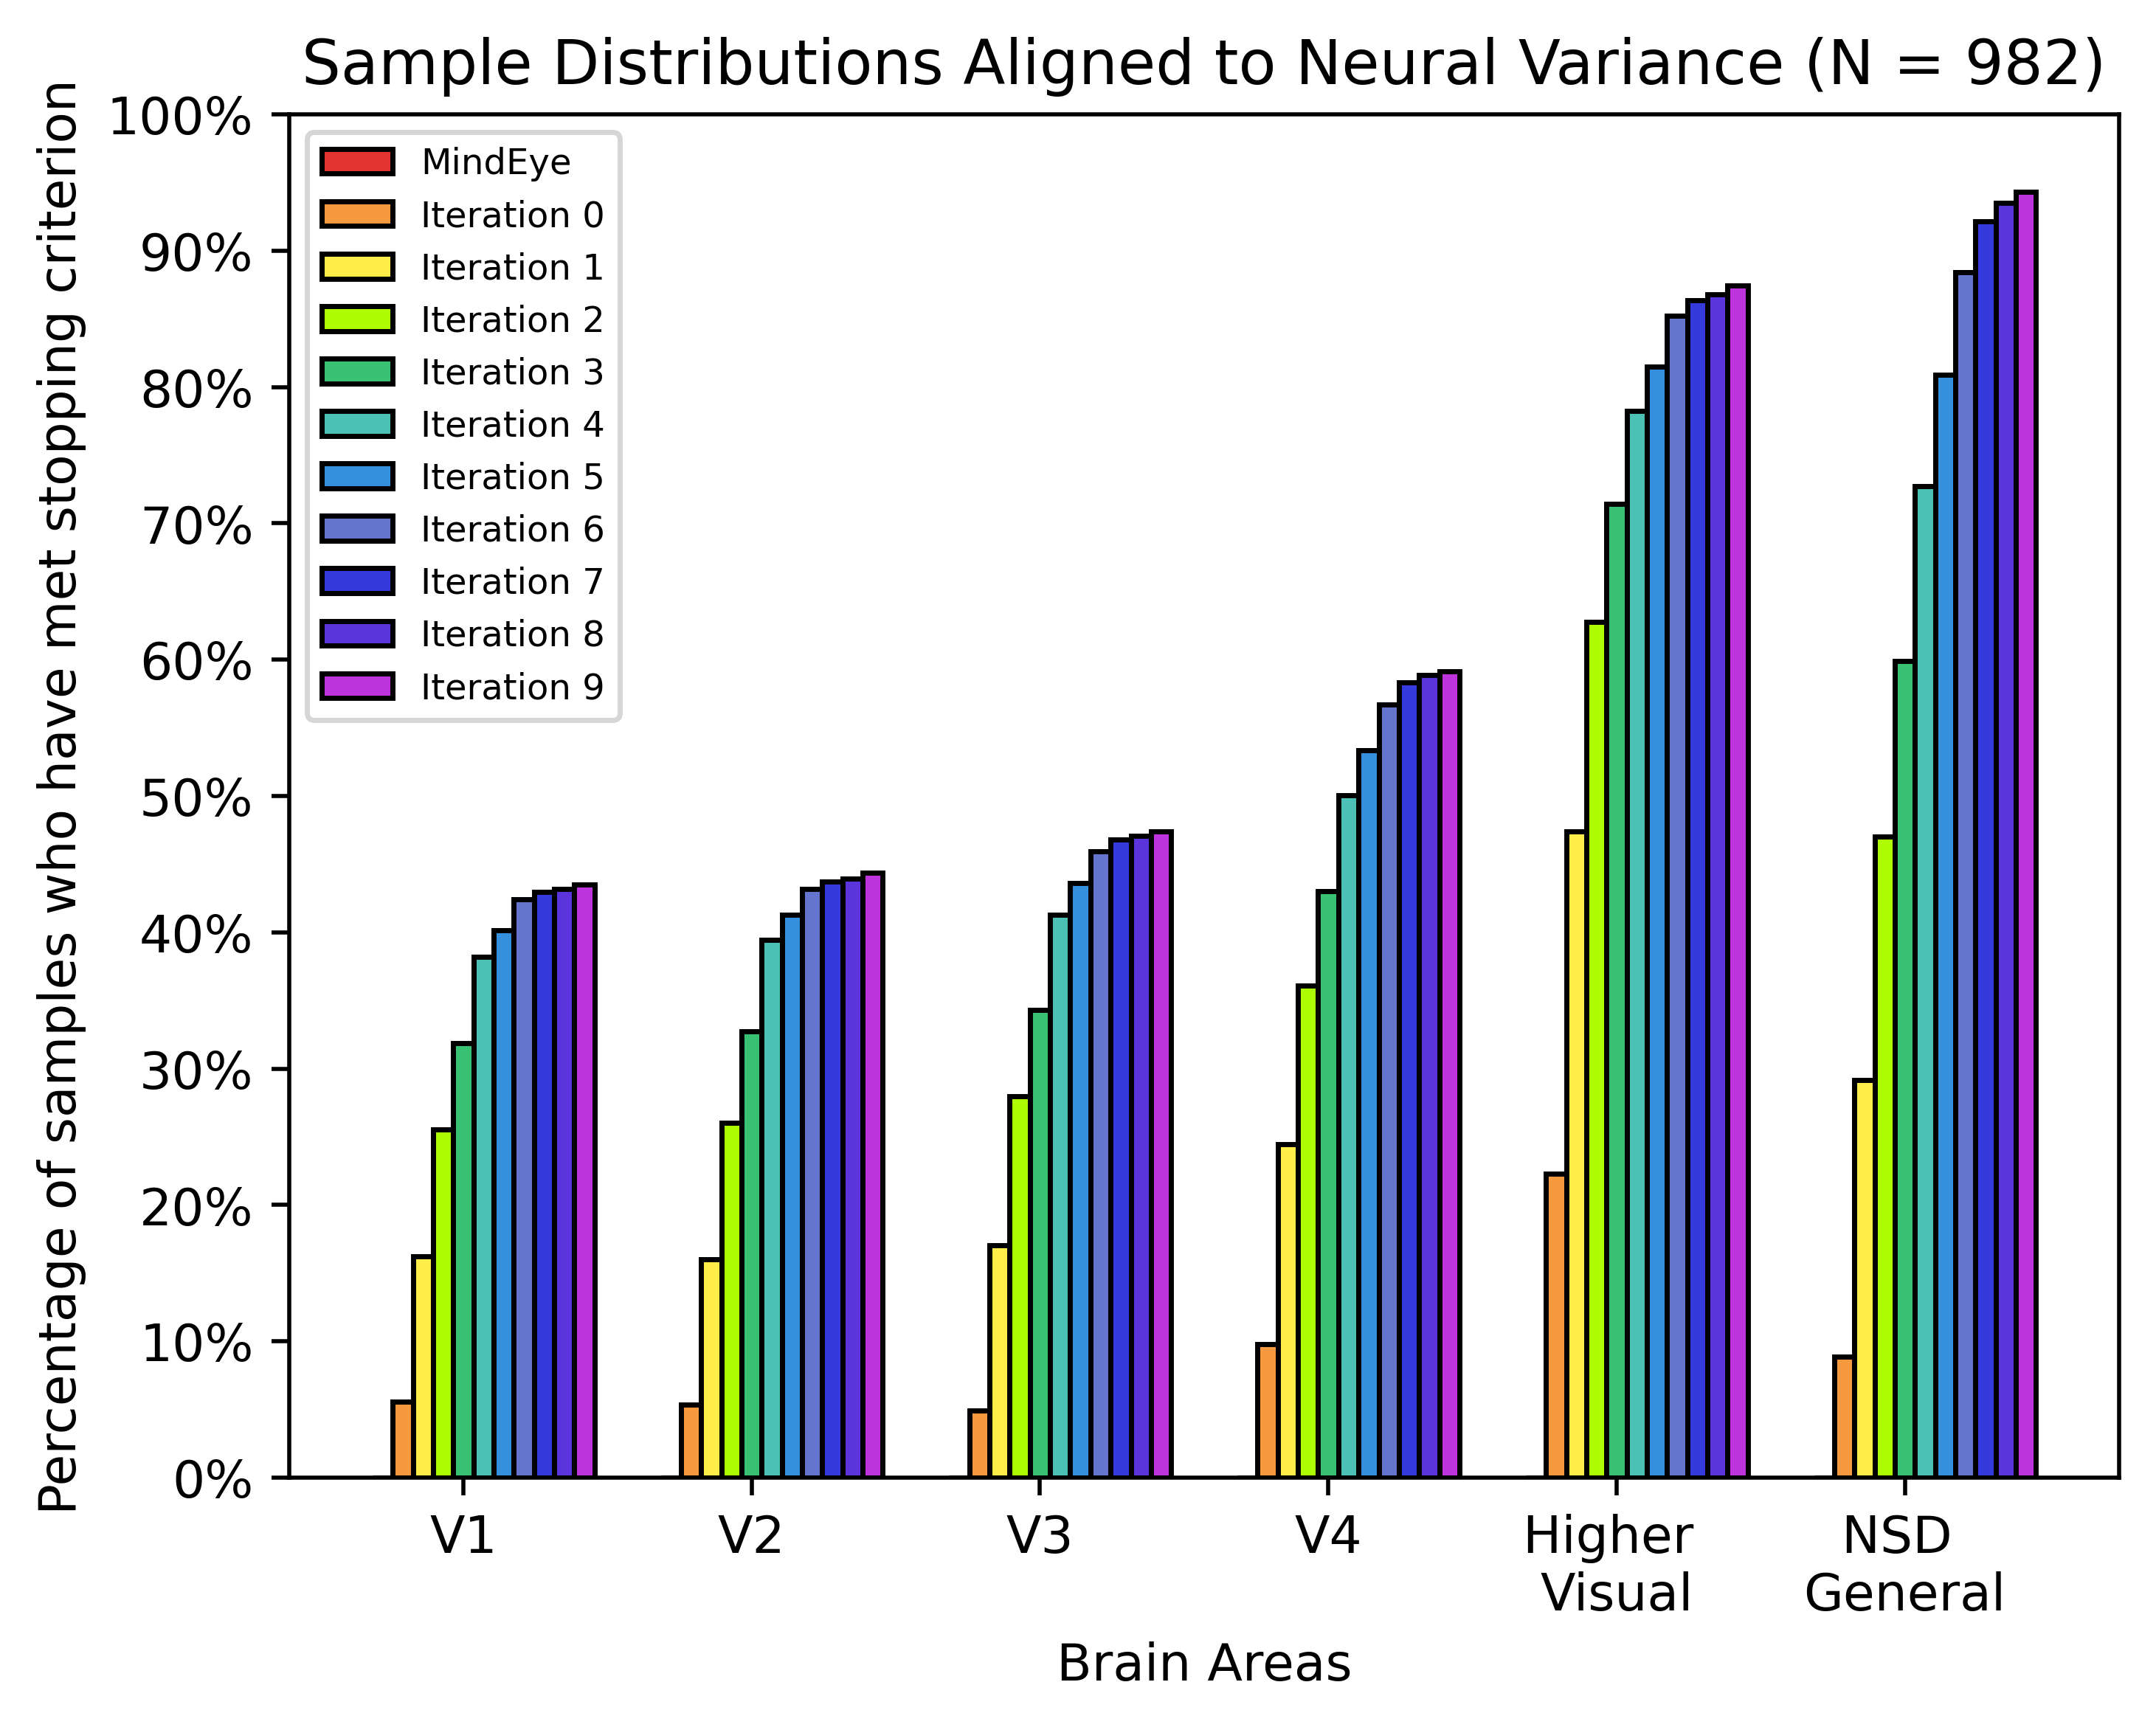

In [9]:
x = ["V1", "V2", "V3", "V4", "Higher \nVisual", "NSD \nGeneral"]
x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.07

plt.bar(r - width * 4, thresholds[0], color = '#e3342f',
        width = width, edgecolor = 'black',
        label='MindEye')
plt.bar(r - width * 3, thresholds[1], color = '#f6993f',
        width = width, edgecolor = 'black',
        label='Iteration 0')
plt.bar(r - width * 2, thresholds[2], color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='Iteration 1')
plt.bar(r - width, thresholds[3], color = '#adfc03',
        width = width, edgecolor = 'black',
        label='Iteration 2')
plt.bar(r, thresholds[4], color = '#38c172',
        width = width, edgecolor = 'black',
        label='Iteration 3')
plt.bar(r + width, thresholds[5], color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='Iteration 4')
plt.bar(r + width * 2, thresholds[6], color = '#3490dc',
        width = width, edgecolor = 'black',
        label='Iteration 5')
plt.bar(r + width * 3, thresholds[7], color = '#6574cd',
        width = width, edgecolor = 'black',
        label='Iteration 6')
plt.bar(r + width * 4, thresholds[8], color = '#343adc',
        width = width, edgecolor = 'black',
        label='Iteration 7')
plt.bar(r + width * 5, thresholds[9], color = '#5b34dc',
        width = width, edgecolor = 'black',
        label='Iteration 8')
plt.bar(r + width * 6, thresholds[10], color = '#bd34dc',
        width = width, edgecolor = 'black',
        label='Iteration 9')

plt.xticks(x_axis, x)
plt.yticks(np.linspace(0, 100, 11))
plt.xlabel("Brain Areas")
plt.ylabel("Percentage of samples who have met stopping criterion")
plt.title("Sample Distributions Aligned to Neural Variance (N = 982)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(100))
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()

Empty DataFrame
Columns: [Variance Of Brain Correlation]
Index: []


/tmp/ipykernel_122643/3479566114.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_data.loc[df_data["Search Iterations"] == "VDVAE"].groupby(["Brain Area"]).mean())
/tmp/ipykernel_122643/3479566114.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vdvae = df_data.loc[df_data["Search Iterations"] == "VDVAE"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
/tmp/ipykernel_122643/3479566114.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plt.bar(r - width * 4, vdvae[2:].append(vdvae[0:2]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

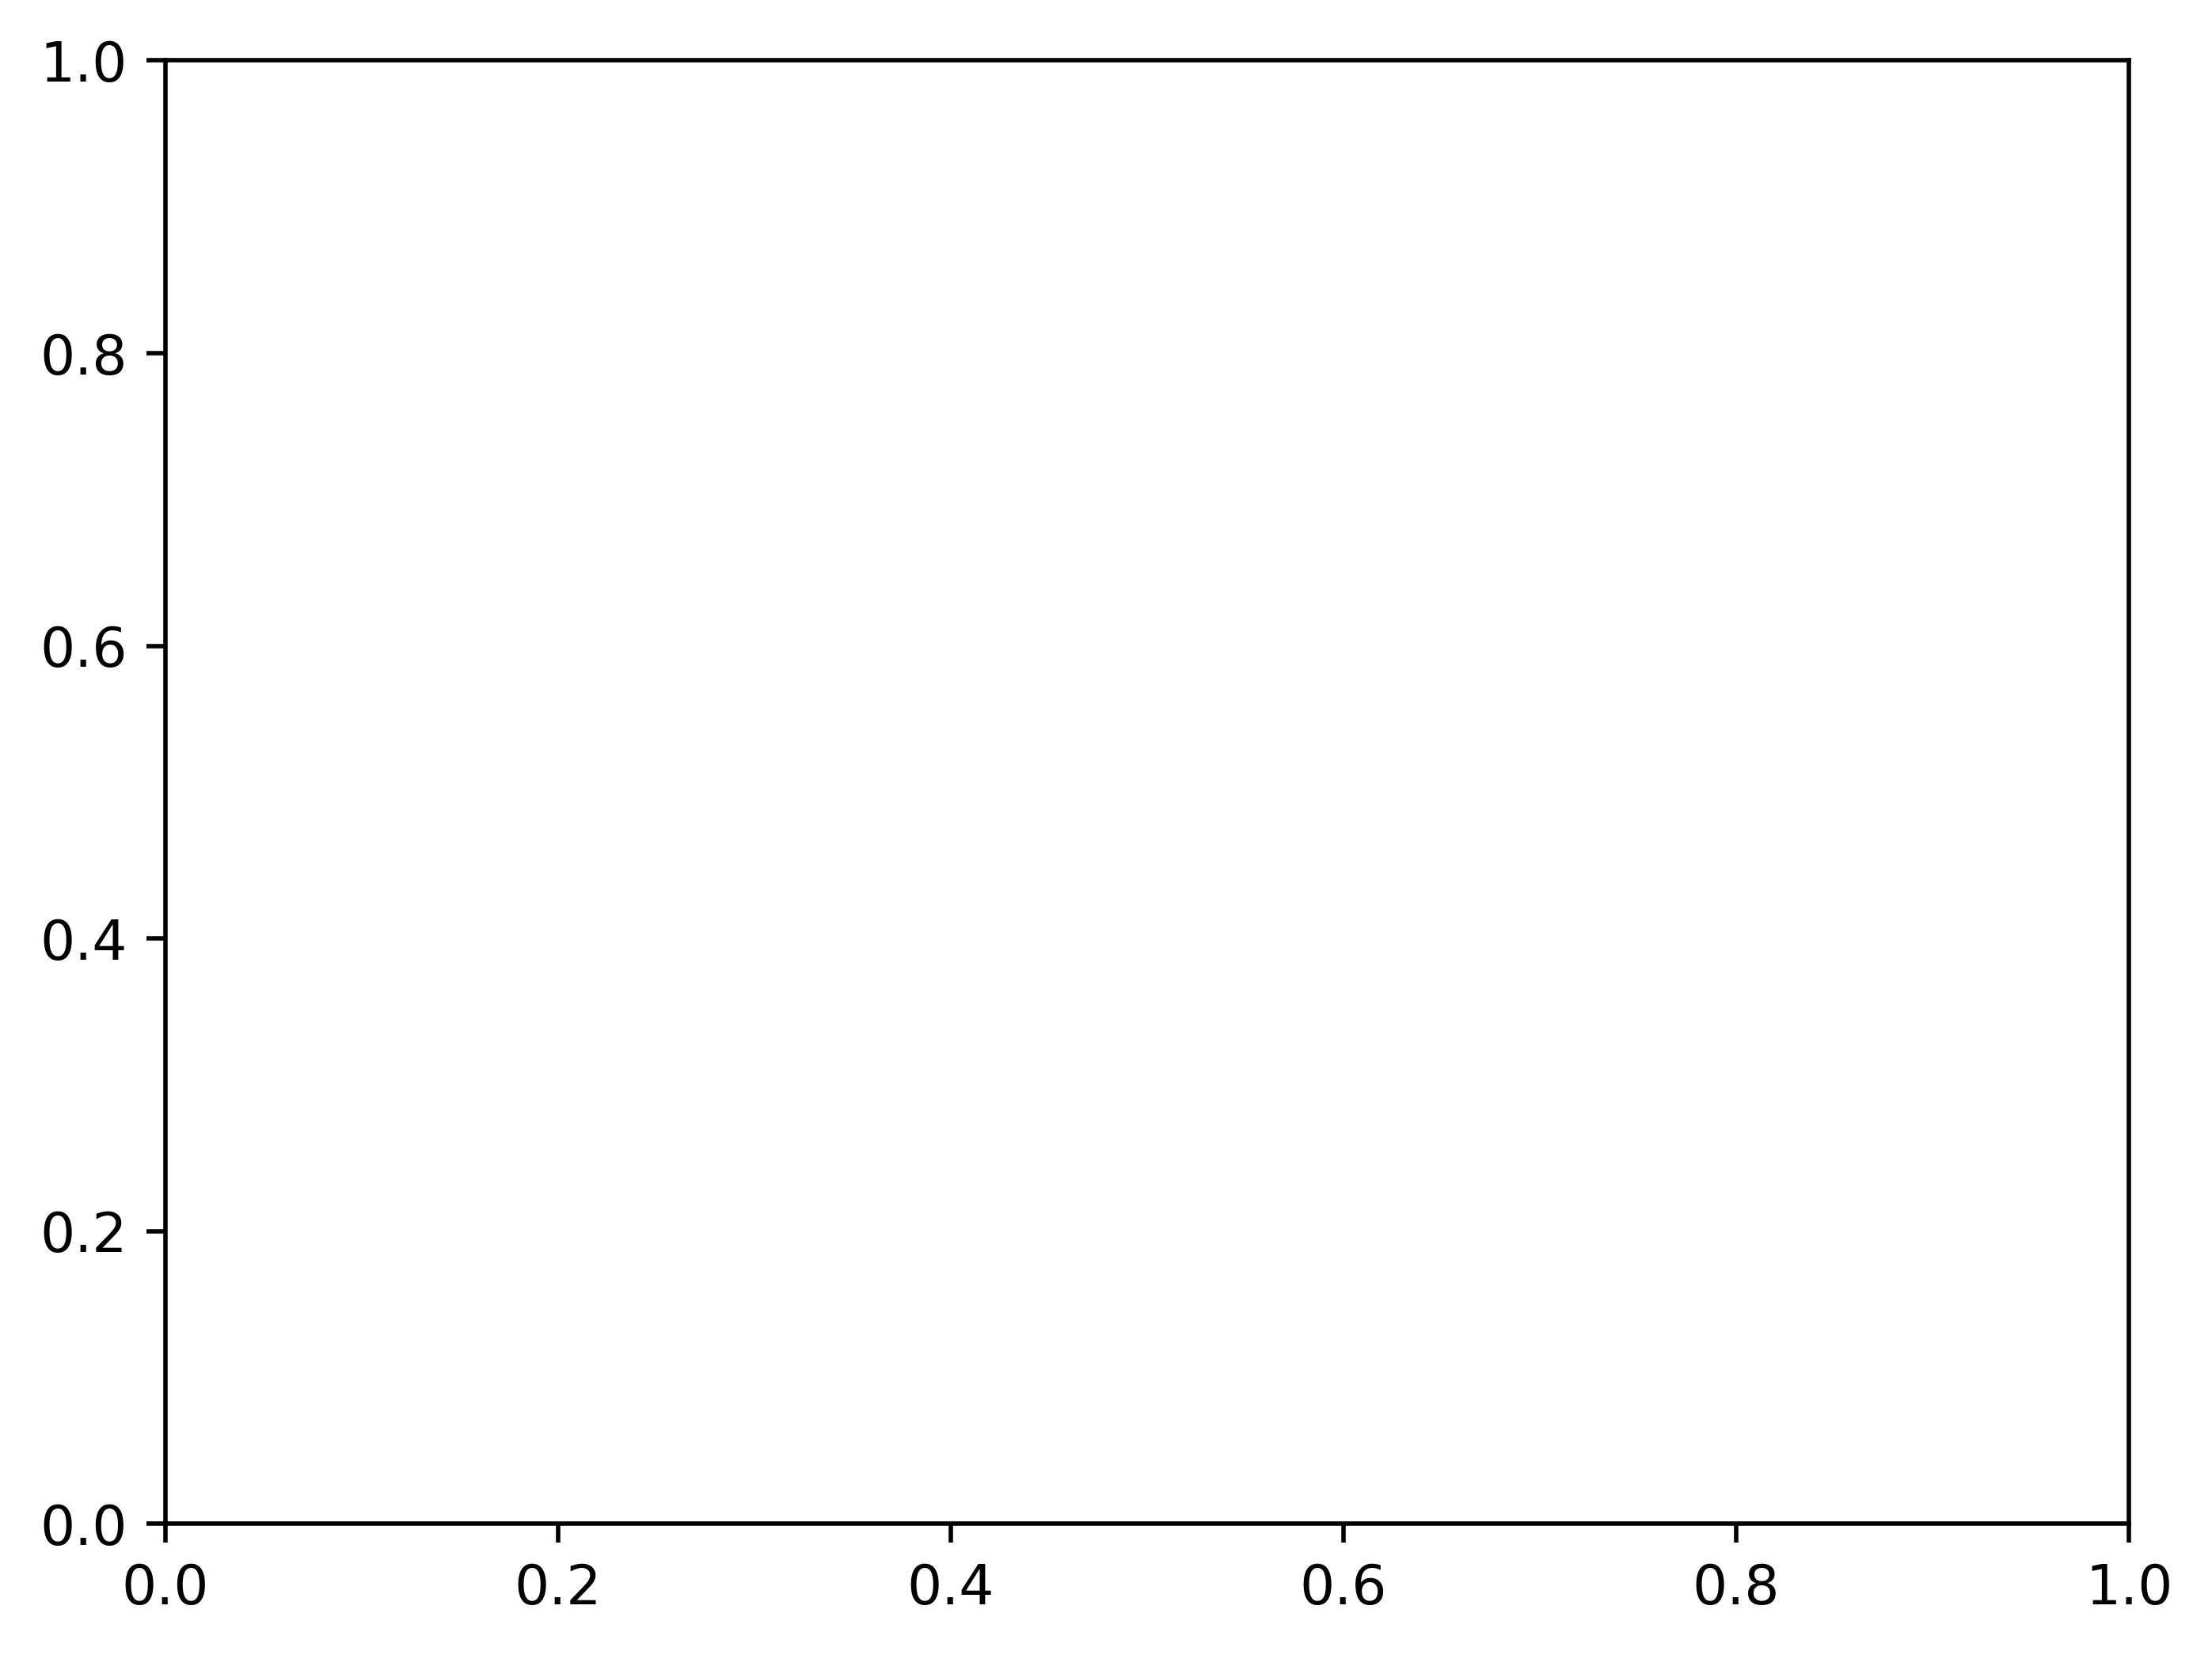

In [59]:
# print(df_data.tail())
custom_palette = ["#e3342f", "#f6993f", "#ffed4a", "#38c172", "#4dc0b5", "#3490dc", "#6574cd", "#9561e2", "#f66d9b"]

# sns.set_palette(custom_palette)
# sns.catplot(data=df_data, x="Brain Area", y="Variance Of Brain Correlation", hue="Search Iterations", s=5).set(title='Variance Of Brain Correlation Across Iterations')
# sns.barplot(data=df_data, x="Brain Area", y="Variance Of Brain Correlation", hue="Search Iterations").set(title='Variance Of Brain Correlation Across Iterations')
x = brain_area_labels
x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.10
print(df_data.loc[df_data["Search Iterations"] == "VDVAE"].groupby(["Brain Area"]).mean())
vdvae = df_data.loc[df_data["Search Iterations"] == "VDVAE"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width * 4, vdvae[2:].append(vdvae[0:2]), color = '#e3342f',
        width = width, edgecolor = 'black',
        label='VDVAE')
clip = df_data.loc[df_data["Search Iterations"] == "CLIP"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width * 3, clip[2:].append(clip[0:2]), color = '#f6993f',
        width = width, edgecolor = 'black',
        label='CLIP')
cv = df_data.loc[df_data["Search Iterations"] == "CLIP+VDVAE"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width * 2, cv[2:].append(cv[0:2]), color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='CLIP+VDVAE')
i0 = df_data.loc[df_data["Search Iterations"] == "Iteration 0"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r - width, i0[2:].append(i0[0:2]), color = '#38c172',
        width = width, edgecolor = 'black',
        label='Iteration 0')
i1 = df_data.loc[df_data["Search Iterations"] == "Iteration 1"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r, i1[2:].append(i1[0:2]), color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='Iteration 1')
i2 = df_data.loc[df_data["Search Iterations"] == "Iteration 2"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width, i2[2:].append(i2[0:2]), color = '#3490dc',
        width = width, edgecolor = 'black',
        label='Iteration 2')
i3 = df_data.loc[df_data["Search Iterations"] == "Iteration 3"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width * 2, i3[2:].append(i3[0:2]), color = '#6574cd',
        width = width, edgecolor = 'black',
        label='Iteration 3')
i4 = df_data.loc[df_data["Search Iterations"] == "Iteration 4"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width * 3, i4[2:].append(i4[0:2]), color = '#9561e2',
        width = width, edgecolor = 'black',
        label='Iteration 4')
i5 = df_data.loc[df_data["Search Iterations"] == "Iteration 5"].groupby(["Brain Area"]).mean()["Variance Of Brain Correlation"]
plt.bar(r + width * 4, i5[2:].append(i5[0:2]), color = '#f66d9b',
        width = width, edgecolor = 'black',
        label='Iteration 5')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Variance Of Brain Correlation Across Sample Distributions")
plt.title("Convergence of Image Distribution Variance Across Iterations")
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()


1     18
2    113
3    381
4    470
Name: picked_target, dtype: int64


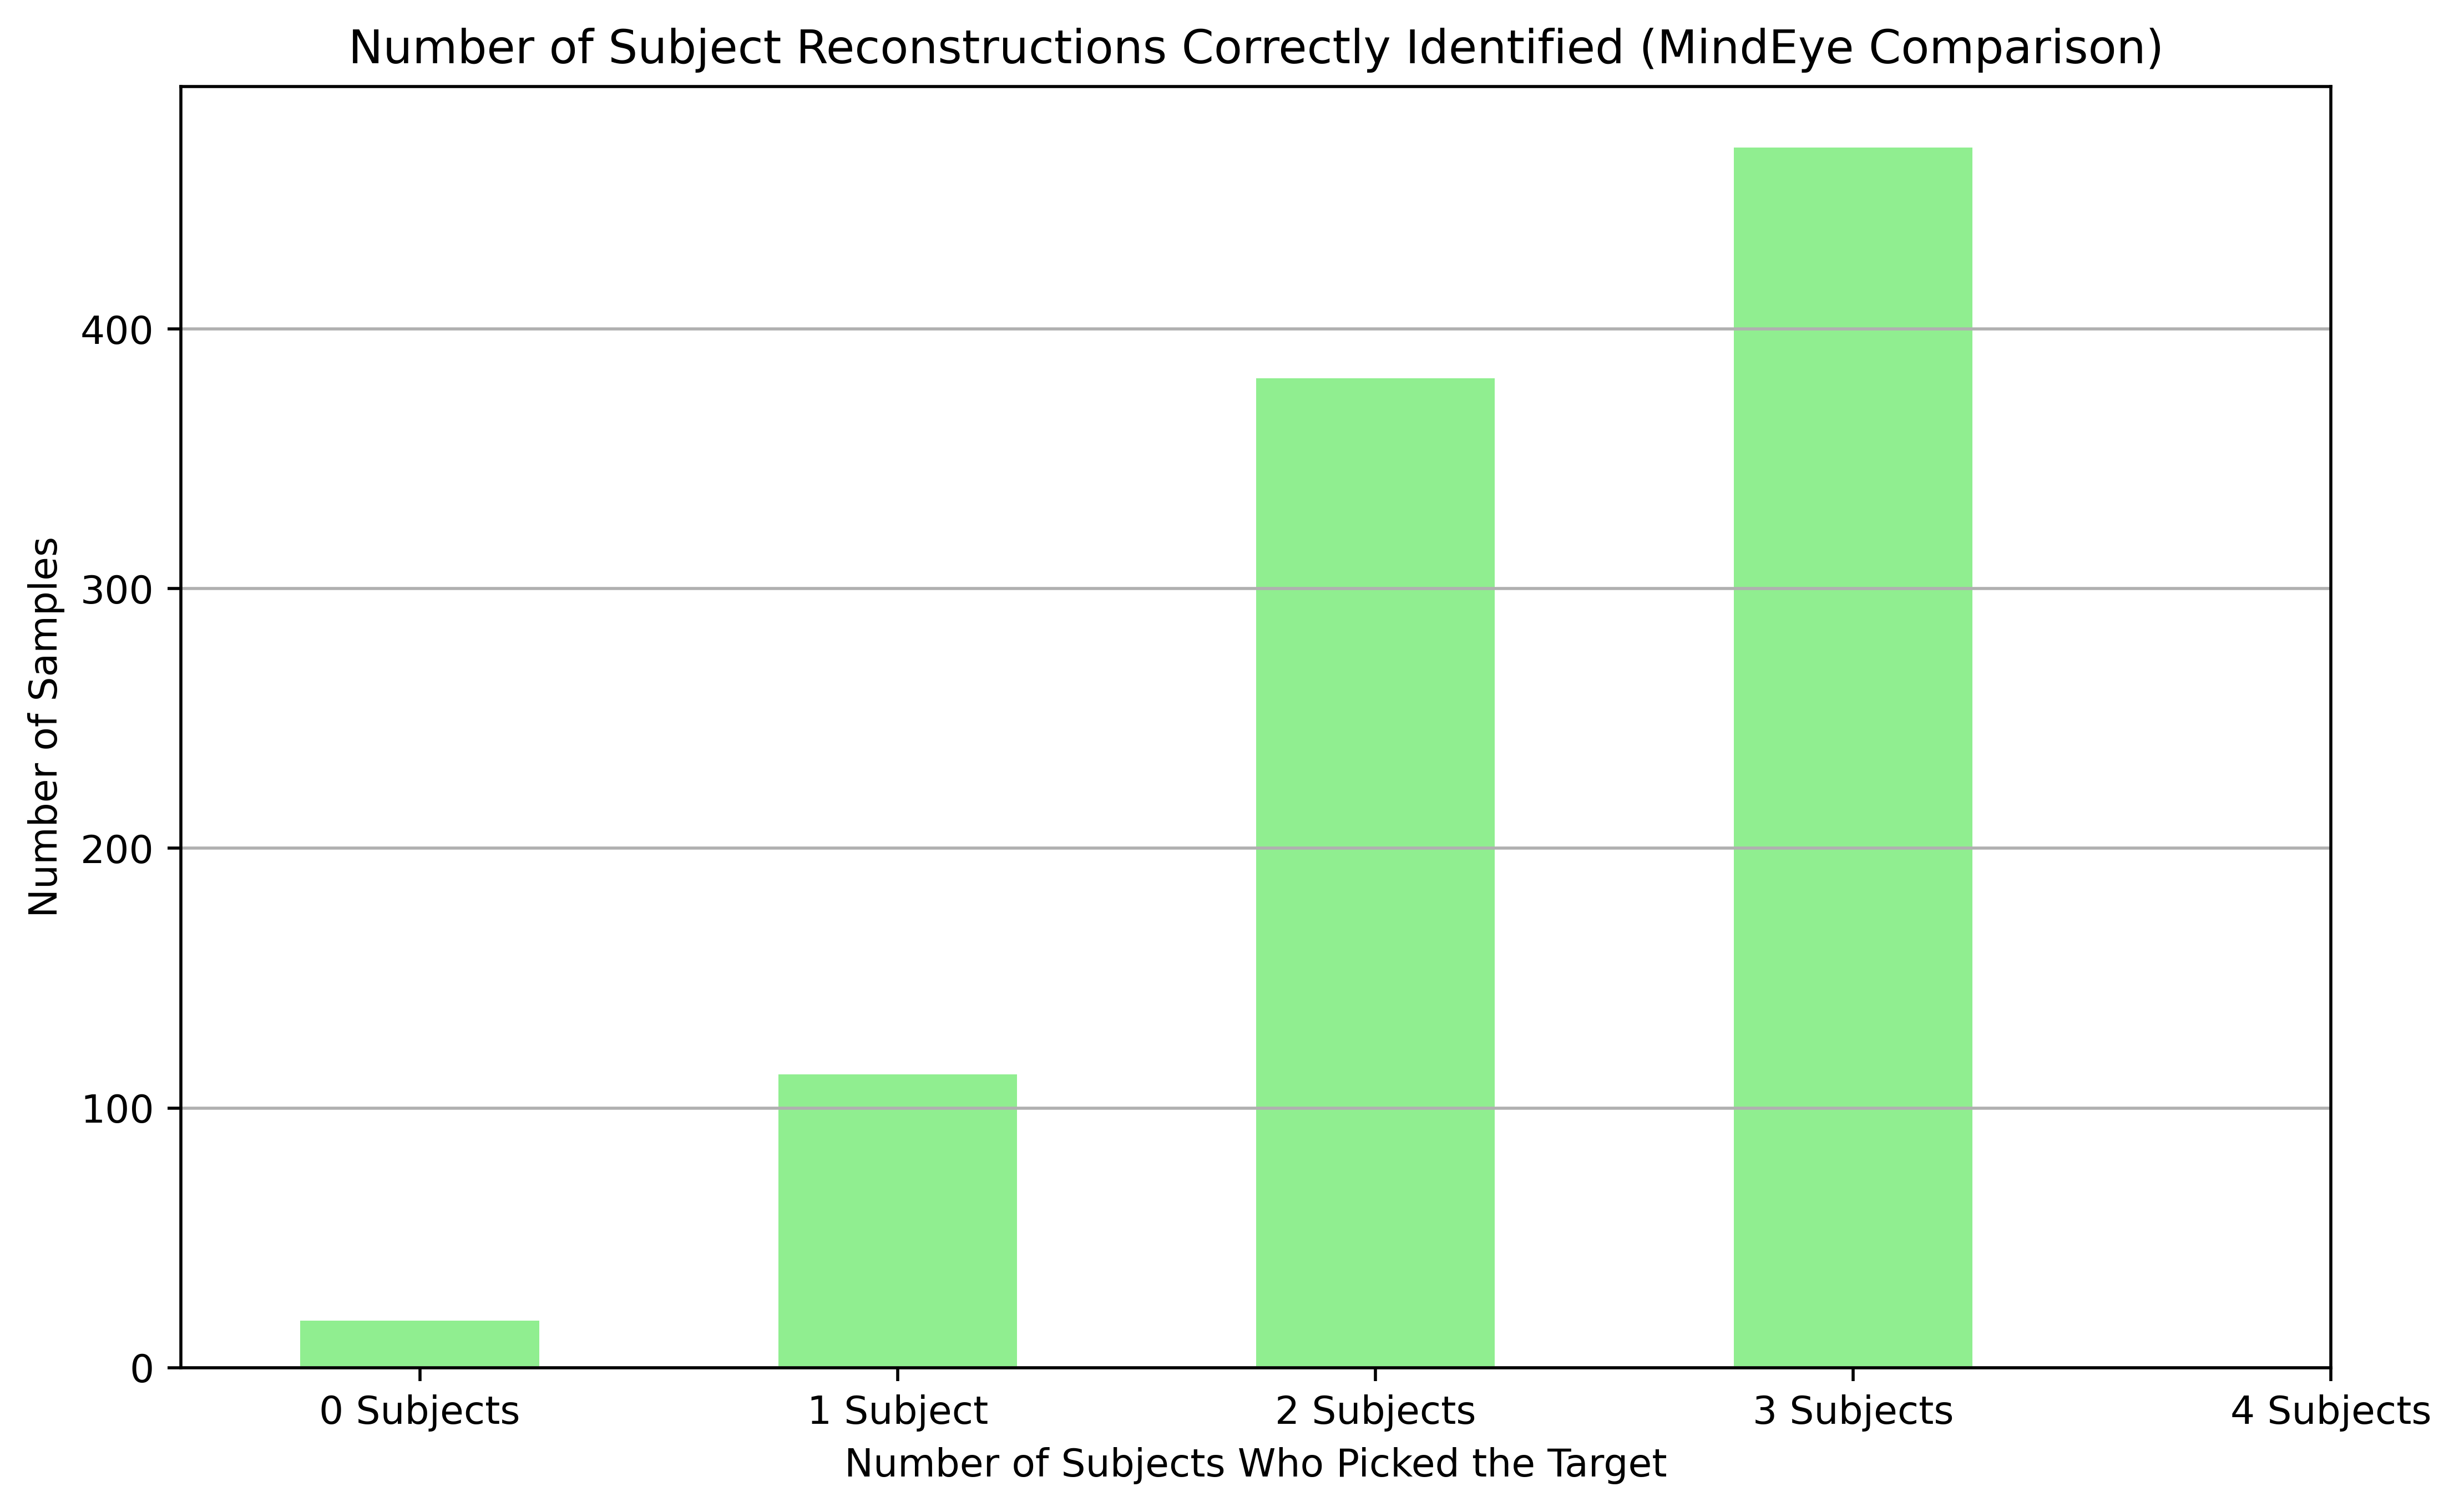

In [61]:
human_df = pd.read_csv("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/experiments/human_preference_11_23/dataframes/responses_v8_clean.csv")
# Filtering the DataFrame to only include Experiment 2
experiment_2_df = human_df[human_df['experiment'] == 2]

# Removing duplicates for each sample, subject combination
experiment_2_df_unique = experiment_2_df.drop_duplicates(subset=['sample', 'subject'])

# Counting how many subjects picked the target for each sample in Experiment 2
picked_target_count_exp2 = experiment_2_df_unique.groupby('sample')['picked_target'].sum()

# Counting the number of samples for each count of subjects who picked the target (0 to 4) in Experiment 2
subject_picked_counts_exp2 = picked_target_count_exp2.value_counts().sort_index()

# Creating a bar plot for Experiment 2
import matplotlib.pyplot as plt
print(subject_picked_counts_exp2)
plt.figure(figsize=(10, 6))
subject_picked_counts_exp2.plot(kind='bar', color='lightgreen')
plt.title('Number of Subject Reconstructions Correctly Identified (MindEye Comparison)')
plt.xlabel('Number of Subjects Who Picked the Target')
plt.ylabel('Number of Samples')
plt.xticks(range(5), ['0 Subjects', '1 Subject', '2 Subjects', '3 Subjects', '4 Subjects'], rotation=0)
plt.grid(axis='y')

plt.show()
# plt.show()

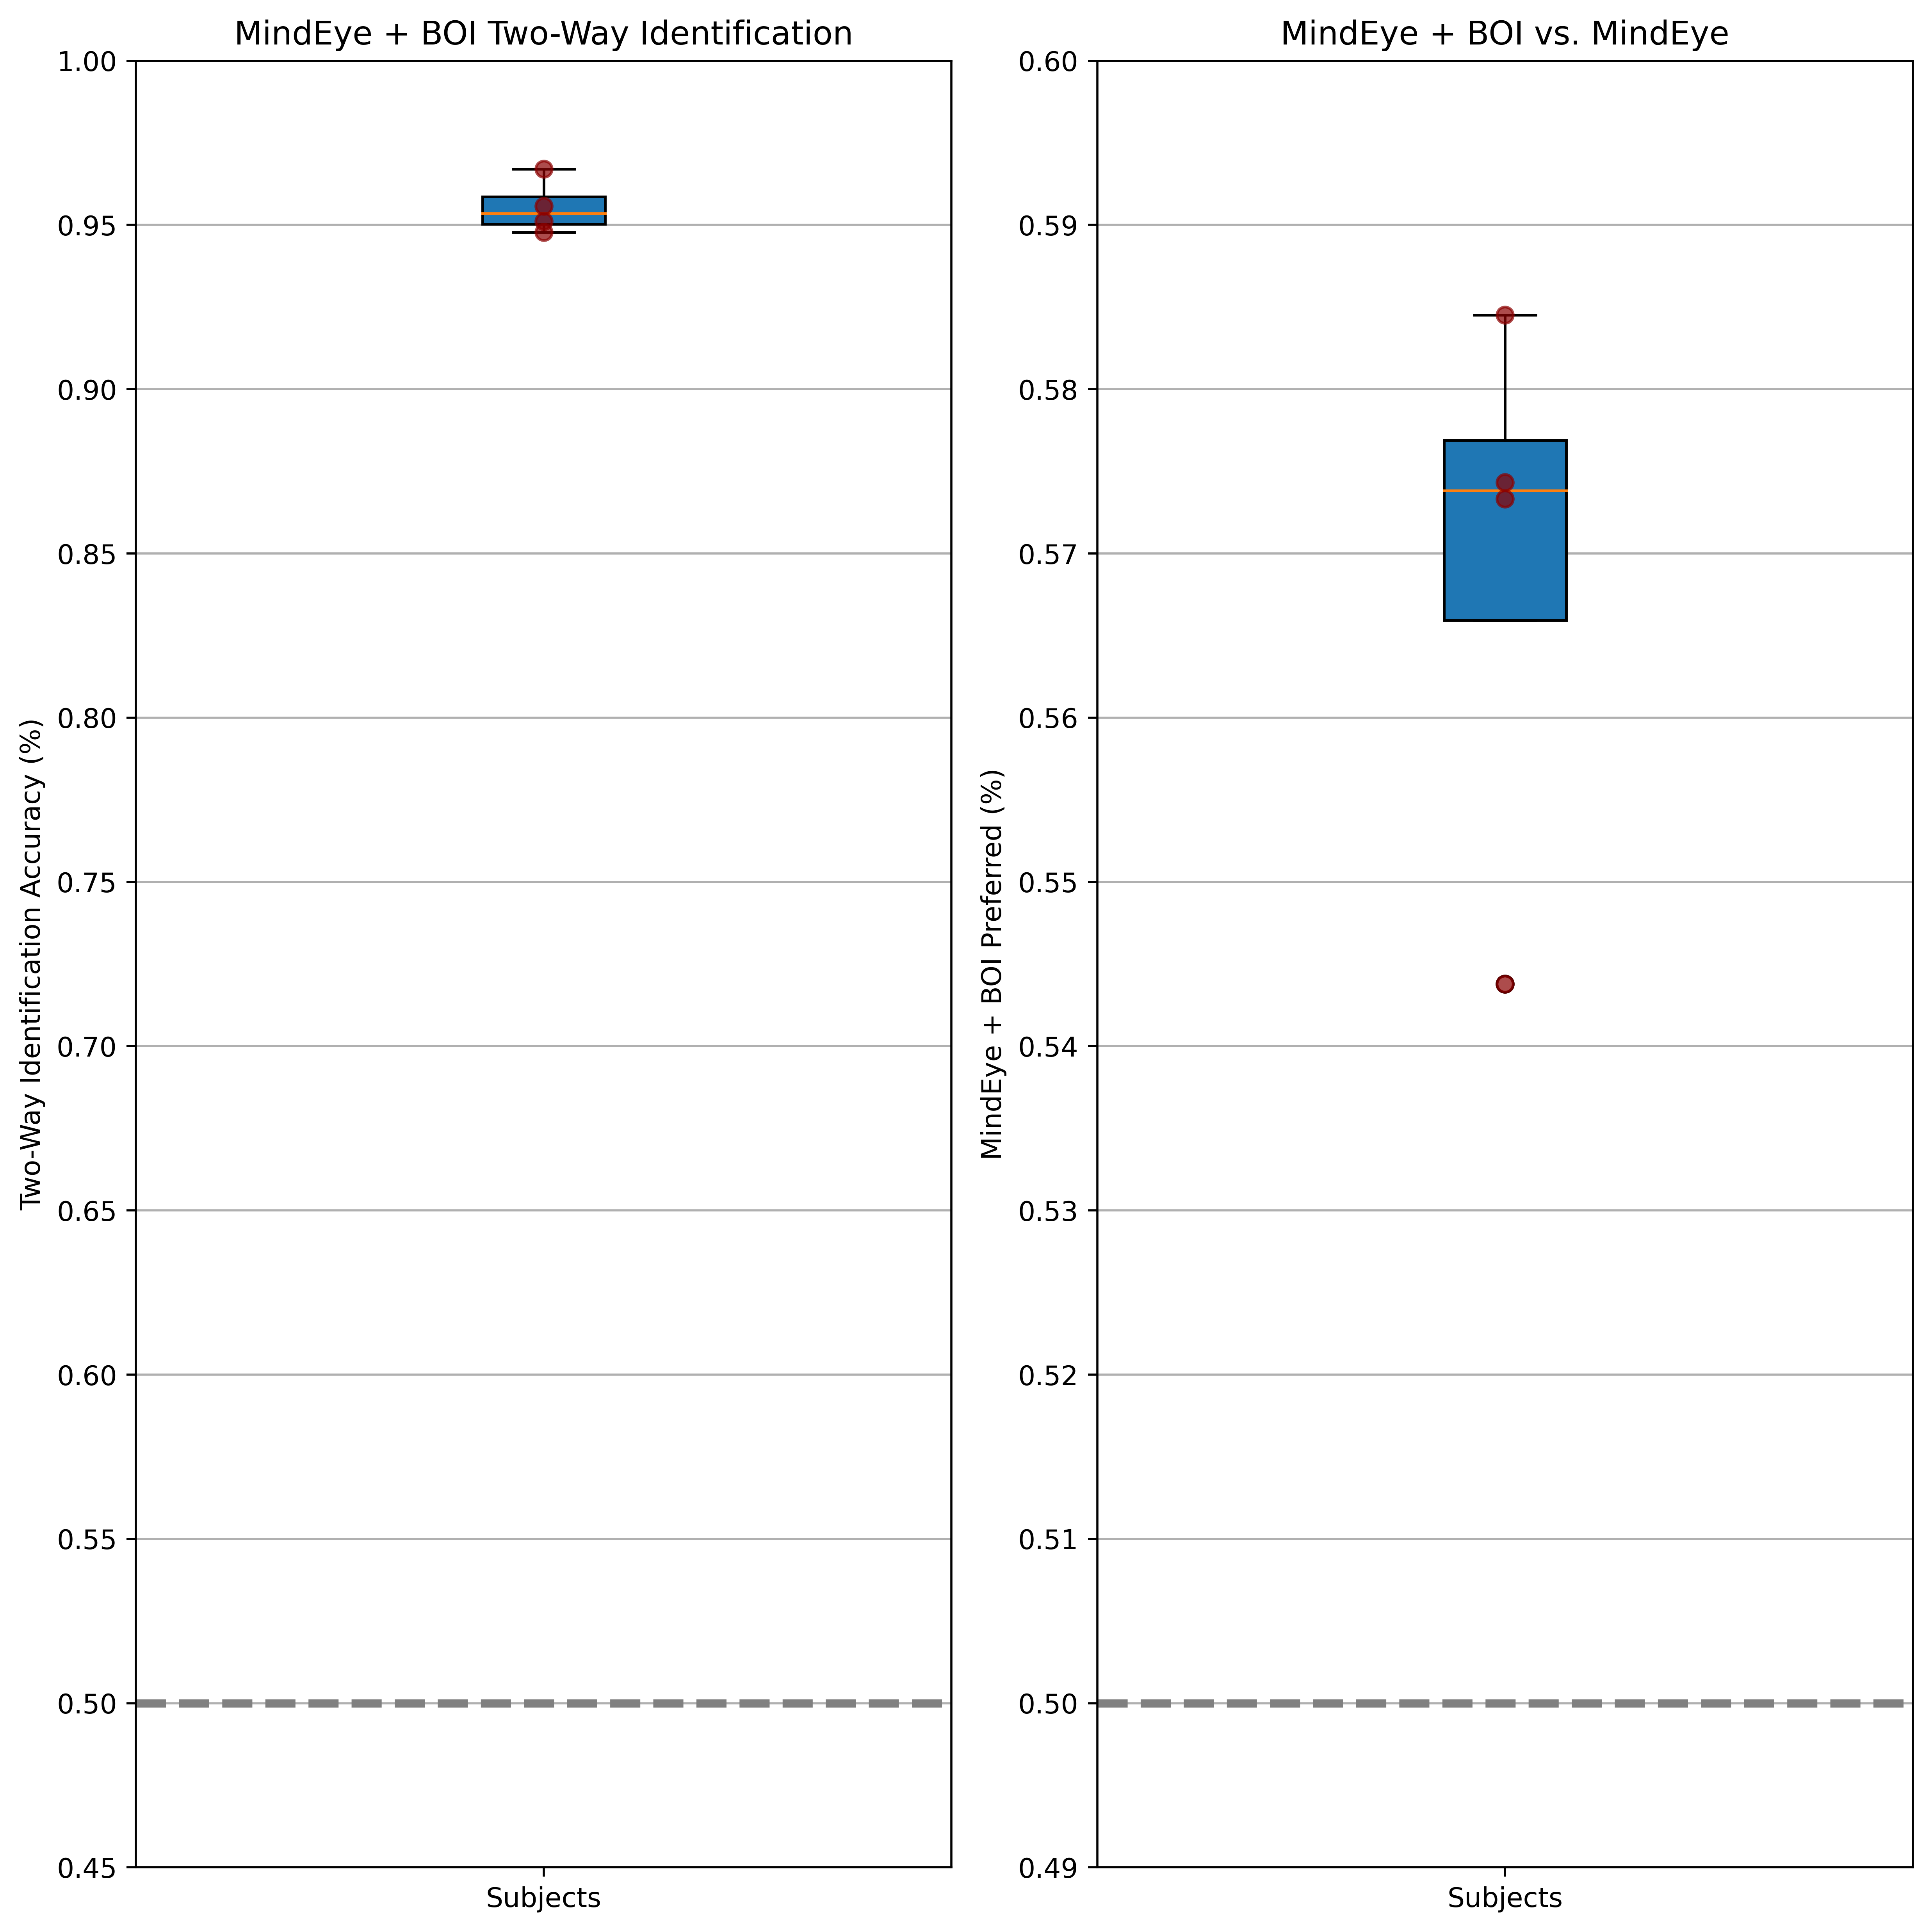

In [62]:
identification_accuracy_per_subject_exp2 = experiment_2_df_unique.groupby('subject')['picked_target'].mean()
experiment_1_df = human_df[human_df['experiment'] == 1]
# First, calculate identification accuracy for each subject in Experiment 1
experiment_1_df_unique = experiment_1_df.drop_duplicates(subset=['sample', 'subject'])
identification_accuracy_per_subject_exp1 = experiment_1_df_unique.groupby('subject')['picked_target'].mean()

# Now, creating a subplot with both Experiment 1 and Experiment 2
plt.figure(figsize=(10, 10))

# Plot for Experiment 1
plt.subplot(1, 2, 2)
plt.boxplot(identification_accuracy_per_subject_exp1, vert=True, patch_artist=True, positions=[1])
plt.scatter([1]*len(identification_accuracy_per_subject_exp1), identification_accuracy_per_subject_exp1, alpha=0.7, color='darkred', zorder=3)
plt.title('MindEye + BOI vs. MindEye')
plt.ylabel('MindEye + BOI Preferred (%)')
plt.xticks([1], ['Subjects'])
plt.yticks(np.linspace(0.49, 0.6, 12))  # More precise y-axis ticks
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=3)  # Chance threshold
plt.grid(axis='y')

# Plot for Experiment 2
plt.subplot(1, 2, 1)
plt.boxplot(identification_accuracy_per_subject_exp2, vert=True, patch_artist=True, positions=[1])
plt.scatter([1]*len(identification_accuracy_per_subject_exp2), identification_accuracy_per_subject_exp2, alpha=0.7, color='darkred', zorder=3)
plt.title('MindEye + BOI Two-Way Identification')
plt.ylabel('Two-Way Identification Accuracy (%)')
plt.xticks([1], ['Subjects'])
plt.yticks(np.linspace(0.45, 1, 12))  # More precise y-axis ticks
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=3)  # Chance threshold
plt.grid(axis='y')

plt.tight_layout()
plt.show()